In [1]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import urllib.request

# Import dataset

In [2]:
link='https://github.com/duonghung86/Fatality-crashes/raw/master/Codes/final%20data.zip'
url = urllib.request.urlopen(link)
with ZipFile(BytesIO(url.read())) as my_zip_file:
    for contained_file in my_zip_file.namelist():
        fzip=my_zip_file.open(contained_file)
        data=fzip.read()

s=str(data,'utf-8')
data = StringIO(s)
df=pd.read_csv(data)
print(df.shape)
df.head()

(488849, 151)


,Prsn_Injry_Sev_ID,Unit_Nbr,Prsn_Age,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Latitude,Longitude,...,Traffic_Cntl_ID_SIGNAL LIGHT WITH RED LIGHT RUNNING CAMERA,Traffic_Cntl_ID_STOP SIGN,Traffic_Cntl_ID_WARNING SIGN,Unit_Desc_ID_MOTOR VEHICLE,Unit_Desc_ID_MOTORIZED CONVEYANCE,Unit_Desc_ID_NON-CONTACT,Unit_Desc_ID_OTHER (EXPLAIN IN NARRATIVE),Unit_Desc_ID_PEDALCYCLIST,Unit_Desc_ID_PEDESTRIAN,Unit_Desc_ID_TOWED/PUSHED/TRAILER
0,0,1,48.0,0,35,0,0,0,30.660685,-93.893906,...,0,0,0,1,0,0,0,0,0,0
1,2,2,58.0,0,35,0,0,0,30.660685,-93.893906,...,0,0,0,1,0,0,0,0,0,0
2,0,1,68.0,0,45,0,0,1,33.203920,-96.596654,...,0,0,0,1,0,0,0,0,0,0
3,0,3,67.0,0,45,0,0,1,33.203920,-96.596654,...,0,0,0,1,0,0,0,0,0,0
4,0,1,36.0,0,35,0,0,1,29.792394,-95.746539,...,0,0,1,1,0,0,0,0,0,0


In [4]:
y=np.where(df['Prsn_Injry_Sev_ID']==4,1,0)
y

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:
    Total: 488849
    Positive: 1494 (0.31% of total)



In [6]:
X=df.iloc[:,1:].copy()
X

,Unit_Nbr,Prsn_Age,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Latitude,Longitude,Crash_month,...,Traffic_Cntl_ID_SIGNAL LIGHT WITH RED LIGHT RUNNING CAMERA,Traffic_Cntl_ID_STOP SIGN,Traffic_Cntl_ID_WARNING SIGN,Unit_Desc_ID_MOTOR VEHICLE,Unit_Desc_ID_MOTORIZED CONVEYANCE,Unit_Desc_ID_NON-CONTACT,Unit_Desc_ID_OTHER (EXPLAIN IN NARRATIVE),Unit_Desc_ID_PEDALCYCLIST,Unit_Desc_ID_PEDESTRIAN,Unit_Desc_ID_TOWED/PUSHED/TRAILER
0,1,48.0,0,35,0,0,0,30.660685,-93.893906,6,...,0,0,0,1,0,0,0,0,0,0
1,2,58.0,0,35,0,0,0,30.660685,-93.893906,6,...,0,0,0,1,0,0,0,0,0,0
2,1,68.0,0,45,0,0,1,33.203920,-96.596654,6,...,0,0,0,1,0,0,0,0,0,0
3,3,67.0,0,45,0,0,1,33.203920,-96.596654,6,...,0,0,0,1,0,0,0,0,0,0
4,1,36.0,0,35,0,0,1,29.792394,-95.746539,6,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488844,1,68.0,0,70,0,0,1,28.954878,-97.987513,11,...,0,0,0,1,0,0,0,0,0,0
488845,1,44.0,0,55,0,0,1,32.756880,-94.354907,11,...,0,1,0,1,0,0,0,0,0,0
488846,2,57.0,0,55,0,0,1,32.756880,-94.354907,11,...,0,1,0,1,0,0,0,0,0,0
488847,1,16.0,0,40,0,0,0,31.279209,-94.579816,9,...,0,1,0,1,0,0,0,0,0,0


# Split the dataset

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train, random_state=48)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training features shape: (312863, 150)
Validation features shape: (78216, 150)
Test features shape: (97770, 150)


In [9]:
y_train=np.array(y_train).reshape(len(y_train),1)
y_test=np.array(y_test).reshape(len(y_test),1)
y_val=np.array(y_val).reshape(len(y_val),1)

print('Training features shape:', y_train.shape)
print('Validation features shape:', y_val.shape)
print('Test features shape:', y_test.shape)

Training features shape: (312863, 1)
Validation features shape: (78216, 1)
Test features shape: (97770, 1)


In [10]:
# standardization
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# MLP simple

## Mini functions

### Create model

In [12]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.1.0


In [13]:
metrics = [keras.metrics.BinaryAccuracy(name='accuracy'),
          keras.metrics.Precision(name='precision'),
          keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc')]

In [14]:
metrics = [keras.metrics.BinaryAccuracy(name='accuracy'),keras.metrics.AUC(name='auc')]

In [15]:
def create_model(nodes=20,actih='relu',actio='sigmoid',lr=1e-3,output_bias=None,logits=False):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    model = keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=actih,input_dim=X_train.shape[1]))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation=actio,bias_initializer=output_bias))
    
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                  loss=keras.losses.BinaryCrossentropy(from_logits=logits),
                  metrics=metrics)
    return model

### Show confusion matrix


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
def CI(arr):
    op=[arr[0,0],arr[1,1]]/arr.sum(axis=0)
    op=np.append(op,(arr[0,0]+arr[1,1])/arr.sum())
    op=pd.DataFrame(op,columns=['Precision'],index=['0','1','Global'])
    op['n_p']=np.append(arr.sum(axis=0),arr.sum())
    op['CI_p']=196*np.sqrt(op.Precision*(1-op.Precision)/op.n_p)
    op['Precision']=op.Precision*100

    op['Recall']=np.append([arr[0,0],arr[1,1]]/arr.sum(axis=1),(arr[0,0]+arr[1,1])/arr.sum())
    op['n_r']=np.append(arr.sum(axis=1),arr.sum())
    op['CI_r']=196*np.sqrt(op.Recall*(1-op.Recall)/op.n_r)
    op['Recall']=op.Recall*100
    return op

In [18]:
def show_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    print(cm)
    pcm=classification_report(labels, predictions > p, target_names=['Class 0','Class 1']) 
    print(pcm)
    return CI(cm)

### Plot ROC


In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name + ' (area = %0.2f)' % auc(fp, tp), linewidth=1.5, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([0,100.5])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [21]:
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_train

<TensorSliceDataset shapes: ((150,), (1,)), types: (tf.float64, tf.int32)>

In [22]:
data_val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_val

<TensorSliceDataset shapes: ((150,), (1,)), types: (tf.float64, tf.int32)>

In [23]:
initial_bias = np.log([pos/neg])
initial_bias

array([-5.78753572])

In [48]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [25]:
batch_size=2048
data_train = data_train.shuffle(len(X_train)).batch(batch_size)
data_val = data_val.shuffle(len(X_val)).batch(batch_size)

In [26]:
import time

### Initial weights

In [27]:
model = create_model(output_bias = initial_bias)
model.predict(X_train[:10])

array([[0.00471044],
       [0.0028761 ],
       [0.00174774],
       [0.00389626],
       [0.00263414],
       [0.00190601],
       [0.0043803 ],
       [0.00223479],
       [0.00286854],
       [0.00290411]], dtype=float32)

In [28]:
results = model.evaluate(X_train, y_train, batch_size=2048, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0221


In [29]:
import os
import tempfile

In [30]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [31]:
def create_model2(nodes=20,actih='relu',actio='sigmoid',lr=1e-3,logits=False):
    
    #output_bias = tf.keras.initializers.Constant(initial_bias)
    model = keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=actih,input_dim=X_train.shape[1]))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation=actio,bias_initializer=None))
    
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                  loss=keras.losses.BinaryCrossentropy(from_logits=logits),
                  metrics=metrics)
    model.load_weights(initial_weights)
    return model

## Class weight

### Class weight estimation

In [32]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 163.60


### Run model with class weight

In [33]:
start_time=time.time()
wei_model=create_model2()
Monitor = wei_model.fit(data_train, epochs=100,callbacks=[es],validation_data = data_val,class_weight=class_weight, verbose = 1)
end_time=time.time()
end_time-start_time

Train for 153 steps, validate for 39 steps
Epoch 1/100
153/153 [==============================] - 13s 85ms/step - loss: 1.6360 - accuracy: 0.9838 - auc: 0.7620 - val_loss: 0.7229 - val_accuracy: 0.9777 - val_auc: 0.9116
Epoch 2/100
153/153 [==============================] - 5s 33ms/step - loss: 0.7431 - accuracy: 0.9410 - auc: 0.8778 - val_loss: 0.5798 - val_accuracy: 0.9361 - val_auc: 0.9296
Epoch 3/100
153/153 [==============================] - 6s 36ms/step - loss: 0.5662 - accuracy: 0.9074 - auc: 0.9025 - val_loss: 0.3973 - val_accuracy: 0.9258 - val_auc: 0.9381
Epoch 4/100
153/153 [==============================] - 5s 34ms/step - loss: 0.5496 - accuracy: 0.9011 - auc: 0.9038 - val_loss: 0.3690 - val_accuracy: 0.9189 - val_auc: 0.9441
Epoch 5/100
153/153 [==============================] - 5s 36ms/step - loss: 0.4881 - accuracy: 0.9020 - auc: 0.9176 - val_loss: 0.3435 - val_accuracy: 0.9160 - val_auc: 0.9465
Epoch 6/100
153/153 [==============================] - 5s 34ms/step - loss: 

190.1456024646759

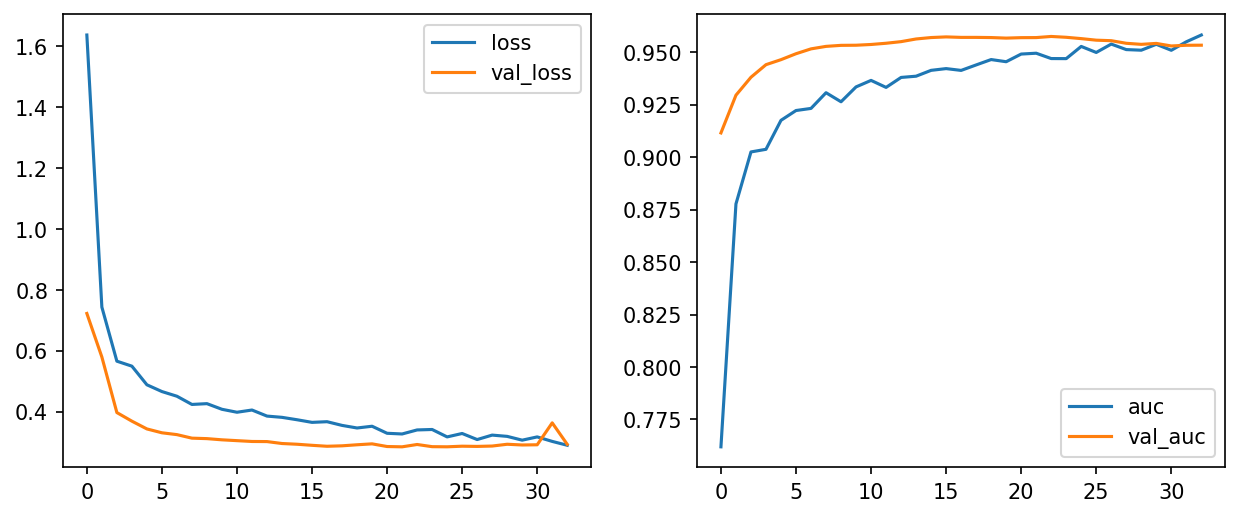

In [34]:
hist = pd.DataFrame(Monitor.history)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4),dpi=150)
hist[['loss','val_loss']].plot(ax=axes[0])
hist[['auc','val_auc']].plot(ax=axes[1])
plt.show()

### Result


In [35]:
y_pred_train_b = wei_model.predict(X_train)
y_pred_test_b = wei_model.predict(X_test)

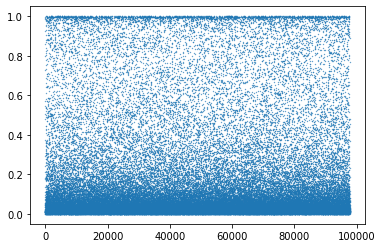

In [36]:
plt.scatter(np.arange(len(y_test)),y_pred_test_b,s=0.1)
plt.show()

In [37]:
show_cm(y_test,y_pred_test_b)

[[89278  8193]
 [   48   251]]
              precision    recall  f1-score   support

     Class 0       1.00      0.92      0.96     97471
     Class 1       0.03      0.84      0.06       299

    accuracy                           0.92     97770
   macro avg       0.51      0.88      0.51     97770
weighted avg       1.00      0.92      0.95     97770



,Precision,n_p,CI_p,Recall,n_r,CI_r
0,99.946264,89326,0.015198,91.594423,97471,0.174195
1,2.972525,8444,0.362236,83.946488,299,4.161087
Global,91.571034,97770,0.174148,91.571034,97770,0.174148


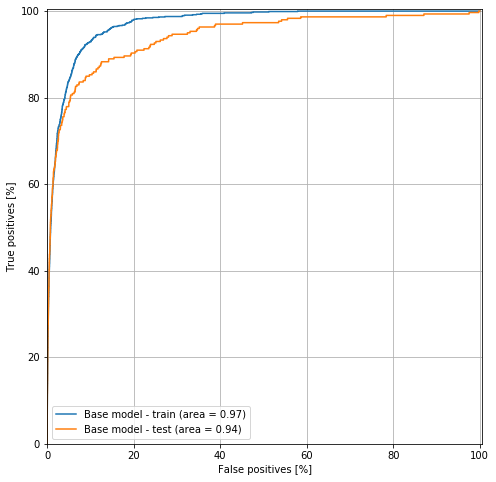

In [38]:
plt.figure(figsize=(8,8))
plot_roc('Base model - train',y_train,y_pred_train_b)
plot_roc('Base model - test',y_test,y_pred_test_b)
plt.legend()
plt.show()

# Tuning parameters


In [39]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [44]:
learning_rates = [0.1,0.01,0.001]
nodes = [5,10,20,30]
batches=[1024,2048,4096]
param_options = {'lr': learning_rates,'nodes': nodes,'batch_size':batches}     

In [45]:
scores={'BA':'balanced_accuracy'}

In [49]:
model= KerasClassifier(build_fn = create_model)
grid = GridSearchCV(estimator=model, 
                    param_grid=param_options,
                    scoring='balanced_accuracy')

start_time=time.time()

grid_result = grid.fit(X_train, y_train,
                       callbacks=[es],
                       epochs=100,
                       class_weight=class_weight,
                       validation_data = (X_val,y_val),verbose = 1)
end_time=time.time()

print((end_time-start_time)/60)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 16us/sample - loss: 0.9036 - accuracy: 0.7307 - auc: 0.6955 - val_loss: 0.4930 - val_accuracy: 0.8637 - val_auc: 0.8927
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6570 - accuracy: 0.5516 - auc: 0.7469 - val_loss: 0.4700 - val_accuracy: 0.6957 - val_auc: 0.8709
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6491 - accuracy: 0.5039 - auc: 0.7600 - val_loss: 0.4736 - val_accuracy: 0.6658 - val_auc: 0.8684
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5666 - accuracy: 0.5478 - auc: 0.8059 - val_loss: 0.5012 - val_accuracy: 0.7384 - val_auc: 0.8804
Epoch 5/100
250290/250290 [==============================] - 2s 10us/sample - loss: 0.5265 - accuracy: 0.5577 - auc: 0.7741 - val_loss: 0.4805 - val_accuracy: 0.6683 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.5303 - accuracy: 0.4672 - auc: 0.7324 - val_loss: 0.8518 - val_accuracy: 0.6629 - val_auc: 0.8164
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5682 - accuracy: 0.4568 - auc: 0.7195 - val_loss: 1.0415 - val_accuracy: 0.6508 - val_auc: 0.8110
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6963 - accuracy: 0.4300 - auc: 0.7007 - val_loss: 1.5168 - val_accuracy: 0.5724 - val_auc: 0.7427
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8126 - accuracy: 0.4220 - auc: 0.6963 - val_loss: 1.1405 - val_accuracy: 0.6226 - val_auc: 0.7990
Epoch 19/100
250290/250290 [==============================] - 2s 10us/sample - loss: 0.5279 - accuracy: 0.4291 - auc: 0.7138 - val_loss: 1.4233 - val_accuracy: 0.6436 - val_auc: 0.7981
Epoch 20/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5306 -

250291/250291 [==============================] - 2s 7us/sample - loss: 0.6087 - accuracy: 0.9443 - auc: 0.7316 - val_loss: 0.4209 - val_accuracy: 0.9273 - val_auc: 0.9214
Epoch 5/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.6056 - accuracy: 0.9412 - auc: 0.7499 - val_loss: 0.4195 - val_accuracy: 0.9217 - val_auc: 0.9104
Epoch 6/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5734 - accuracy: 0.9472 - auc: 0.7348 - val_loss: 0.4423 - val_accuracy: 0.8841 - val_auc: 0.9078
Epoch 7/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.7486 - accuracy: 0.9383 - auc: 0.6471 - val_loss: 0.7576 - val_accuracy: 0.0031 - val_auc: 0.5037
Epoch 8/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.7410 - accuracy: 0.5129 - auc: 0.5120 - val_loss: 0.7239 - val_accuracy: 0.9961 - val_auc: 0.5381
Epoch 9/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.8332 - accur

250290/250290 [==============================] - 4s 14us/sample - loss: 1.0382 - accuracy: 0.7681 - auc: 0.7541 - val_loss: 0.6345 - val_accuracy: 0.8908 - val_auc: 0.9084
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.1925 - accuracy: 0.8070 - auc: 0.7890 - val_loss: 0.5995 - val_accuracy: 0.4669 - val_auc: 0.8514
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.0140 - accuracy: 0.7426 - auc: 0.7746 - val_loss: 0.3720 - val_accuracy: 0.9434 - val_auc: 0.9407
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.7682 - accuracy: 0.9013 - auc: 0.8448 - val_loss: 0.4290 - val_accuracy: 0.8806 - val_auc: 0.9401
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.0384 - accuracy: 0.6263 - auc: 0.7742 - val_loss: 0.6029 - val_accuracy: 0.5990 - val_auc: 0.8425
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8454 - accu

250290/250290 [==============================] - 2s 8us/sample - loss: 0.8715 - accuracy: 0.2878 - auc: 0.6379 - val_loss: 2.3721 - val_accuracy: 0.9957 - val_auc: 0.7173
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.7161 - accuracy: 0.3127 - auc: 0.6372 - val_loss: 4.2979 - val_accuracy: 0.4713 - val_auc: 0.7194
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.6401 - accuracy: 0.3005 - auc: 0.6496 - val_loss: 3.4788 - val_accuracy: 0.4746 - val_auc: 0.7234
Epoch 00022: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 15us/sample - loss: 1.4815 - accuracy: 0.7150 - auc: 0.7186 - val_loss: 0.6241 - val_accuracy: 0.7552 - val_auc: 0.8944
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.9954 - accuracy: 0.8606 - auc: 0.7917 - val_loss: 0.6643 - val_

250291/250291 [==============================] - 2s 9us/sample - loss: 0.6171 - accuracy: 0.4995 - auc: 0.7472 - val_loss: 0.7632 - val_accuracy: 0.6608 - val_auc: 0.8195
Epoch 15/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5418 - accuracy: 0.5308 - auc: 0.7527 - val_loss: 0.8328 - val_accuracy: 0.6801 - val_auc: 0.8295
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4701 - accuracy: 0.5499 - auc: 0.7719 - val_loss: 0.7091 - val_accuracy: 0.6953 - val_auc: 0.8364
Epoch 17/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5164 - accuracy: 0.5525 - auc: 0.7603 - val_loss: 0.8633 - val_accuracy: 0.6748 - val_auc: 0.8283
Epoch 18/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5010 - accuracy: 0.5501 - auc: 0.7721 - val_loss: 1.2660 - val_accuracy: 0.6872 - val_auc: 0.8252
Epoch 19/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.7514 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 2.5637 - accuracy: 0.8405 - auc: 0.7986 - val_loss: 2.6196 - val_accuracy: 0.8635 - val_auc: 0.9093
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.8686 - accuracy: 0.7121 - auc: 0.8083 - val_loss: 2.8420 - val_accuracy: 0.9159 - val_auc: 0.8341
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 3.7987 - accuracy: 0.6925 - auc: 0.7946 - val_loss: 3.0715 - val_accuracy: 0.3686 - val_auc: 0.8005
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.5545 - accuracy: 0.5307 - auc: 0.7523 - val_loss: 3.9655 - val_accuracy: 0.9350 - val_auc: 0.8844
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 3.3912 - accuracy: 0.6910 - auc: 0.7827 - val_loss: 2.5631 - val_accuracy: 0.5223 - val_auc: 0.8465
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 7.6157 - accur

Epoch 00021: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 15us/sample - loss: 2.5810 - accuracy: 0.7253 - auc: 0.7581 - val_loss: 0.8039 - val_accuracy: 0.9251 - val_auc: 0.8950
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.2997 - accuracy: 0.8091 - auc: 0.7867 - val_loss: 1.8169 - val_accuracy: 0.9606 - val_auc: 0.8787
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.4032 - accuracy: 0.8380 - auc: 0.7842 - val_loss: 1.9348 - val_accuracy: 0.8492 - val_auc: 0.9163
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 3.4398 - accuracy: 0.7448 - auc: 0.7437 - val_loss: 1.6993 - val_accuracy: 0.9564 - val_auc: 0.8643
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.5505 - accuracy: 0.5605 - auc: 0.7300 - val_loss: 2.7

250291/250291 [==============================] - 2s 9us/sample - loss: 0.5990 - accuracy: 0.4317 - auc: 0.7281 - val_loss: 2.1356 - val_accuracy: 0.5903 - val_auc: 0.7841
Epoch 20/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.6380 - accuracy: 0.4316 - auc: 0.7386 - val_loss: 2.3987 - val_accuracy: 0.5834 - val_auc: 0.7903
Epoch 21/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.7595 - accuracy: 0.4300 - auc: 0.7336 - val_loss: 2.2291 - val_accuracy: 0.5756 - val_auc: 0.7921
Epoch 00021: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 17us/sample - loss: 2.0729 - accuracy: 0.7580 - auc: 0.7932 - val_loss: 1.6338 - val_accuracy: 0.7335 - val_auc: 0.9006
Epoch 2/100
250291/250291 [==============================] - 2s 9us/sample - loss: 3.9890 - accuracy: 0.7947 - auc: 0.7959 - val_loss: 6.1850 - val_

250290/250290 [==============================] - 2s 9us/sample - loss: 2.4900 - accuracy: 0.5127 - auc: 0.7741 - val_loss: 4.6614 - val_accuracy: 0.5551 - val_auc: 0.8957
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8607 - accuracy: 0.4831 - auc: 0.8048 - val_loss: 4.4400 - val_accuracy: 0.5485 - val_auc: 0.7713
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.6150 - accuracy: 0.4658 - auc: 0.7355 - val_loss: 5.1358 - val_accuracy: 0.5270 - val_auc: 0.7855
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.3218 - accuracy: 0.4446 - auc: 0.7228 - val_loss: 3.3184 - val_accuracy: 0.4689 - val_auc: 0.7556
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9574 - accuracy: 0.4480 - auc: 0.7701 - val_loss: 5.4693 - val_accuracy: 0.5576 - val_auc: 0.8911
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.5984 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.7224 - accuracy: 0.4866 - auc: 0.7557 - val_loss: 3.9524 - val_accuracy: 0.6497 - val_auc: 0.8258
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6236 - accuracy: 0.4410 - auc: 0.7385 - val_loss: 4.0424 - val_accuracy: 0.6346 - val_auc: 0.8328
Epoch 27/100
250290/250290 [==============================] - 3s 10us/sample - loss: 0.5309 - accuracy: 0.4423 - auc: 0.7520 - val_loss: 3.4953 - val_accuracy: 0.5863 - val_auc: 0.8442
Epoch 28/100
250290/250290 [==============================] - 3s 12us/sample - loss: 0.5959 - accuracy: 0.4081 - auc: 0.7259 - val_loss: 4.2274 - val_accuracy: 0.5924 - val_auc: 0.8069
Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 15us/sample - loss: 4.7338 - accuracy: 0.6909 - auc: 0.7597 - val_loss: 5.3360 - v

250291/250291 [==============================] - 2s 9us/sample - loss: 2.5334 - accuracy: 0.5038 - auc: 0.7499 - val_loss: 6.1299 - val_accuracy: 0.4977 - val_auc: 0.7696
Epoch 15/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.4315 - accuracy: 0.4178 - auc: 0.7197 - val_loss: 6.8662 - val_accuracy: 0.5127 - val_auc: 0.7351
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.4322 - accuracy: 0.3903 - auc: 0.6843 - val_loss: 5.5225 - val_accuracy: 0.5112 - val_auc: 0.7359
Epoch 17/100
250291/250291 [==============================] - 2s 9us/sample - loss: 3.7764 - accuracy: 0.3638 - auc: 0.6527 - val_loss: 8.2807 - val_accuracy: 0.4810 - val_auc: 0.7269
Epoch 18/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.1988 - accuracy: 0.3405 - auc: 0.6753 - val_loss: 8.5422 - val_accuracy: 0.4850 - val_auc: 0.7605
Epoch 19/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.1106 - 

250291/250291 [==============================] - 2s 9us/sample - loss: 8.1228 - accuracy: 0.4102 - auc: 0.6935 - val_loss: 8.6452 - val_accuracy: 0.7502 - val_auc: 0.7305
Epoch 13/100
250291/250291 [==============================] - 2s 9us/sample - loss: 5.2890 - accuracy: 0.4607 - auc: 0.6920 - val_loss: 4.2543 - val_accuracy: 0.4572 - val_auc: 0.7526
Epoch 14/100
250291/250291 [==============================] - 2s 9us/sample - loss: 2.6342 - accuracy: 0.3515 - auc: 0.6951 - val_loss: 8.5644 - val_accuracy: 0.4800 - val_auc: 0.7896
Epoch 15/100
250291/250291 [==============================] - 2s 9us/sample - loss: 5.6752 - accuracy: 0.3884 - auc: 0.7103 - val_loss: 10.1754 - val_accuracy: 0.4732 - val_auc: 0.7920
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 7.3434 - accuracy: 0.5368 - auc: 0.7151 - val_loss: 3.7728 - val_accuracy: 0.8947 - val_auc: 0.8622
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 1.7633 -

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3324 - accuracy: 0.9233 - auc: 0.9307 - val_loss: 0.2727 - val_accuracy: 0.9262 - val_auc: 0.9583
Epoch 32/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3453 - accuracy: 0.9187 - auc: 0.9252 - val_loss: 0.2592 - val_accuracy: 0.9119 - val_auc: 0.9612
Epoch 33/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3275 - accuracy: 0.9193 - auc: 0.9316 - val_loss: 0.2629 - val_accuracy: 0.9212 - val_auc: 0.9606
Epoch 34/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3427 - accuracy: 0.9232 - auc: 0.9238 - val_loss: 0.2638 - val_accuracy: 0.9150 - val_auc: 0.9597
Epoch 35/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3346 - accuracy: 0.9227 - auc: 0.9254 - val_loss: 0.2577 - val_accuracy: 0.9185 - val_auc: 0.9613
Epoch 36/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3113 - 

250290/250290 [==============================] - 4s 14us/sample - loss: 0.6170 - accuracy: 0.8860 - auc: 0.7651 - val_loss: 0.3792 - val_accuracy: 0.9223 - val_auc: 0.9387
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4639 - accuracy: 0.9173 - auc: 0.8489 - val_loss: 0.3469 - val_accuracy: 0.9304 - val_auc: 0.9440
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4561 - accuracy: 0.9120 - auc: 0.8534 - val_loss: 0.3084 - val_accuracy: 0.8896 - val_auc: 0.9528
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4078 - accuracy: 0.9073 - auc: 0.8883 - val_loss: 0.2890 - val_accuracy: 0.8972 - val_auc: 0.9537
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3894 - accuracy: 0.8954 - auc: 0.8958 - val_loss: 0.2893 - val_accuracy: 0.8808 - val_auc: 0.9516
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3719 - accu

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3393 - accuracy: 0.9263 - auc: 0.9285 - val_loss: 0.2803 - val_accuracy: 0.9256 - val_auc: 0.9544
Epoch 15/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3397 - accuracy: 0.9269 - auc: 0.9232 - val_loss: 0.2865 - val_accuracy: 0.9141 - val_auc: 0.9530
Epoch 16/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3450 - accuracy: 0.9262 - auc: 0.9236 - val_loss: 0.2919 - val_accuracy: 0.9116 - val_auc: 0.9513
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3364 - accuracy: 0.9265 - auc: 0.9260 - val_loss: 0.2915 - val_accuracy: 0.9334 - val_auc: 0.9551
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3349 - accuracy: 0.9317 - auc: 0.9243 - val_loss: 0.3005 - val_accuracy: 0.9338 - val_auc: 0.9527
Epoch 19/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3506 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3144 - accuracy: 0.8770 - auc: 0.9439 - val_loss: 0.2615 - val_accuracy: 0.8853 - val_auc: 0.9589
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3086 - accuracy: 0.8853 - auc: 0.9444 - val_loss: 0.2722 - val_accuracy: 0.9012 - val_auc: 0.9553
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2996 - accuracy: 0.8826 - auc: 0.9479 - val_loss: 0.2804 - val_accuracy: 0.8954 - val_auc: 0.9550
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2943 - accuracy: 0.8568 - auc: 0.9492 - val_loss: 0.2735 - val_accuracy: 0.8904 - val_auc: 0.9565
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2878 - accuracy: 0.8282 - auc: 0.9511 - val_loss: 0.2950 - val_accuracy: 0.8923 - val_auc: 0.9544
Epoch 10/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3048 - accu

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2706 - accuracy: 0.9124 - auc: 0.9582 - val_loss: 0.4636 - val_accuracy: 0.9218 - val_auc: 0.9373
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2604 - accuracy: 0.9160 - auc: 0.9615 - val_loss: 0.4110 - val_accuracy: 0.9230 - val_auc: 0.9411
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2584 - accuracy: 0.9157 - auc: 0.9609 - val_loss: 0.3920 - val_accuracy: 0.9188 - val_auc: 0.9435
Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 14us/sample - loss: 0.5260 - accuracy: 0.6286 - auc: 0.8643 - val_loss: 0.3178 - val_accuracy: 0.8577 - val_auc: 0.9455
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3674 - accuracy: 0.8667 - auc: 0.9255 - val_loss: 0.2959 - val_

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2787 - accuracy: 0.9019 - auc: 0.9533 - val_loss: 0.3471 - val_accuracy: 0.8851 - val_auc: 0.9464
Epoch 16/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2722 - accuracy: 0.8930 - auc: 0.9553 - val_loss: 0.3522 - val_accuracy: 0.9076 - val_auc: 0.9456
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2685 - accuracy: 0.9009 - auc: 0.9566 - val_loss: 0.3595 - val_accuracy: 0.8996 - val_auc: 0.9417
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2626 - accuracy: 0.8925 - auc: 0.9586 - val_loss: 0.3944 - val_accuracy: 0.9117 - val_auc: 0.9423
Epoch 19/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2725 - accuracy: 0.9025 - auc: 0.9560 - val_loss: 0.3751 - val_accuracy: 0.9005 - val_auc: 0.9420
Epoch 20/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2531 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3260 - accuracy: 0.9060 - auc: 0.9431 - val_loss: 0.2723 - val_accuracy: 0.9247 - val_auc: 0.9559
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3206 - accuracy: 0.9074 - auc: 0.9436 - val_loss: 0.2677 - val_accuracy: 0.9116 - val_auc: 0.9615
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3050 - accuracy: 0.9081 - auc: 0.9520 - val_loss: 0.2698 - val_accuracy: 0.9236 - val_auc: 0.9581
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3185 - accuracy: 0.9103 - auc: 0.9477 - val_loss: 0.2798 - val_accuracy: 0.9031 - val_auc: 0.9566
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3054 - accuracy: 0.9125 - auc: 0.9499 - val_loss: 0.2813 - val_accuracy: 0.9210 - val_auc: 0.9543
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2984 - accur

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2274 - accuracy: 0.8782 - auc: 0.9685 - val_loss: 0.4101 - val_accuracy: 0.9032 - val_auc: 0.9452
Epoch 22/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2349 - accuracy: 0.8631 - auc: 0.9666 - val_loss: 0.4224 - val_accuracy: 0.8966 - val_auc: 0.9425
Epoch 23/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2240 - accuracy: 0.8675 - auc: 0.9693 - val_loss: 0.4433 - val_accuracy: 0.8933 - val_auc: 0.9381
Epoch 00023: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 14us/sample - loss: 0.4985 - accuracy: 0.8014 - auc: 0.8645 - val_loss: 0.3016 - val_accuracy: 0.8914 - val_auc: 0.9478
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3625 - accuracy: 0.8888 - auc: 0.9304 - val_loss: 0.2924 - val_

250291/250291 [==============================] - 3s 10us/sample - loss: 0.2551 - accuracy: 0.9122 - auc: 0.9629 - val_loss: 0.3455 - val_accuracy: 0.9327 - val_auc: 0.9464
Epoch 15/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2527 - accuracy: 0.9148 - auc: 0.9624 - val_loss: 0.3430 - val_accuracy: 0.9304 - val_auc: 0.9453
Epoch 16/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2586 - accuracy: 0.9096 - auc: 0.9618 - val_loss: 0.3305 - val_accuracy: 0.9205 - val_auc: 0.9461
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2593 - accuracy: 0.9129 - auc: 0.9621 - val_loss: 0.3437 - val_accuracy: 0.9356 - val_auc: 0.9433
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2427 - accuracy: 0.9126 - auc: 0.9666 - val_loss: 0.3763 - val_accuracy: 0.9394 - val_auc: 0.9416
Epoch 19/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2483 -

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3441 - accuracy: 0.8835 - auc: 0.9340 - val_loss: 0.2784 - val_accuracy: 0.8969 - val_auc: 0.9583
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3250 - accuracy: 0.8930 - auc: 0.9429 - val_loss: 0.2796 - val_accuracy: 0.8947 - val_auc: 0.9564
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2971 - accuracy: 0.8985 - auc: 0.9510 - val_loss: 0.2780 - val_accuracy: 0.9110 - val_auc: 0.9585
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3188 - accuracy: 0.8901 - auc: 0.9452 - val_loss: 0.2787 - val_accuracy: 0.9259 - val_auc: 0.9558
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2779 - accuracy: 0.9081 - auc: 0.9573 - val_loss: 0.2761 - val_accuracy: 0.9165 - val_auc: 0.9560
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3021 - accur

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2606 - accuracy: 0.9045 - auc: 0.9612 - val_loss: 0.3504 - val_accuracy: 0.8962 - val_auc: 0.9455
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2610 - accuracy: 0.9063 - auc: 0.9632 - val_loss: 0.4047 - val_accuracy: 0.9195 - val_auc: 0.9459
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2834 - accuracy: 0.9050 - auc: 0.9607 - val_loss: 0.3906 - val_accuracy: 0.9094 - val_auc: 0.9465
Epoch 19/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2661 - accuracy: 0.9075 - auc: 0.9611 - val_loss: 0.4393 - val_accuracy: 0.9212 - val_auc: 0.9438
Epoch 20/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2413 - accuracy: 0.9114 - auc: 0.9670 - val_loss: 0.4278 - val_accuracy: 0.9191 - val_auc: 0.9459
Epoch 21/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2523 - 

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2945 - accuracy: 0.9124 - auc: 0.9550 - val_loss: 0.2711 - val_accuracy: 0.9139 - val_auc: 0.9577
Epoch 10/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2846 - accuracy: 0.9104 - auc: 0.9578 - val_loss: 0.2870 - val_accuracy: 0.9265 - val_auc: 0.9563
Epoch 11/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2783 - accuracy: 0.9113 - auc: 0.9581 - val_loss: 0.2959 - val_accuracy: 0.9304 - val_auc: 0.9505
Epoch 12/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2909 - accuracy: 0.9192 - auc: 0.9566 - val_loss: 0.2944 - val_accuracy: 0.9199 - val_auc: 0.9531
Epoch 13/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2751 - accuracy: 0.9114 - auc: 0.9585 - val_loss: 0.2994 - val_accuracy: 0.9006 - val_auc: 0.9521
Epoch 14/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2574 - 

Epoch 00021: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 14us/sample - loss: 0.6746 - accuracy: 0.4098 - auc: 0.7195 - val_loss: 0.4536 - val_accuracy: 0.6713 - val_auc: 0.9134
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.5221 - accuracy: 0.5643 - auc: 0.8224 - val_loss: 0.3844 - val_accuracy: 0.7912 - val_auc: 0.9373
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4565 - accuracy: 0.8393 - auc: 0.8740 - val_loss: 0.3409 - val_accuracy: 0.8491 - val_auc: 0.9443
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4239 - accuracy: 0.8642 - auc: 0.8874 - val_loss: 0.3171 - val_accuracy: 0.8706 - val_auc: 0.9475
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3914 - accuracy: 0.8789 - auc: 0.9035 - val_loss: 0.3

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3124 - accuracy: 0.7308 - auc: 0.9327 - val_loss: 0.3002 - val_accuracy: 0.8749 - val_auc: 0.9536
Epoch 45/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3208 - accuracy: 0.7280 - auc: 0.9302 - val_loss: 0.3009 - val_accuracy: 0.8740 - val_auc: 0.9539
Epoch 46/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3215 - accuracy: 0.7291 - auc: 0.9285 - val_loss: 0.3054 - val_accuracy: 0.8742 - val_auc: 0.9530
Epoch 00046: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 13us/sample - loss: 0.6853 - accuracy: 0.5647 - auc: 0.7435 - val_loss: 0.4993 - val_accuracy: 0.7333 - val_auc: 0.9162
Epoch 2/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4875 - accuracy: 0.8186 - auc: 0.8876 - val_loss: 0.4139 - val_

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3486 - accuracy: 0.9134 - auc: 0.9265 - val_loss: 0.2796 - val_accuracy: 0.9197 - val_auc: 0.9571
Epoch 11/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3411 - accuracy: 0.9179 - auc: 0.9315 - val_loss: 0.2758 - val_accuracy: 0.9163 - val_auc: 0.9579
Epoch 12/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3424 - accuracy: 0.9154 - auc: 0.9298 - val_loss: 0.2713 - val_accuracy: 0.9166 - val_auc: 0.9596
Epoch 13/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3456 - accuracy: 0.9174 - auc: 0.9251 - val_loss: 0.2700 - val_accuracy: 0.9176 - val_auc: 0.9598
Epoch 14/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3373 - accuracy: 0.9162 - auc: 0.9304 - val_loss: 0.2726 - val_accuracy: 0.9200 - val_auc: 0.9587
Epoch 15/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3407 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3316 - accuracy: 0.9209 - auc: 0.9311 - val_loss: 0.2878 - val_accuracy: 0.9224 - val_auc: 0.9503
Epoch 20/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3337 - accuracy: 0.9256 - auc: 0.9304 - val_loss: 0.2888 - val_accuracy: 0.9215 - val_auc: 0.9496
Epoch 21/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3251 - accuracy: 0.9220 - auc: 0.9347 - val_loss: 0.2891 - val_accuracy: 0.9199 - val_auc: 0.9497
Epoch 22/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3423 - accuracy: 0.9213 - auc: 0.9262 - val_loss: 0.2884 - val_accuracy: 0.9222 - val_auc: 0.9502
Epoch 23/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3210 - accuracy: 0.9256 - auc: 0.9354 - val_loss: 0.2893 - val_accuracy: 0.9218 - val_auc: 0.9497
Epoch 24/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3199 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3402 - accuracy: 0.9242 - auc: 0.9248 - val_loss: 0.2971 - val_accuracy: 0.9212 - val_auc: 0.9508
Epoch 28/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3152 - accuracy: 0.9237 - auc: 0.9370 - val_loss: 0.2974 - val_accuracy: 0.9197 - val_auc: 0.9505
Epoch 29/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3305 - accuracy: 0.9224 - auc: 0.9289 - val_loss: 0.3033 - val_accuracy: 0.9193 - val_auc: 0.9493
Epoch 30/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3173 - accuracy: 0.9257 - auc: 0.9340 - val_loss: 0.3035 - val_accuracy: 0.9161 - val_auc: 0.9495
Epoch 31/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3265 - accuracy: 0.9213 - auc: 0.9306 - val_loss: 0.3099 - val_accuracy: 0.9173 - val_auc: 0.9484
Epoch 32/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3266 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3341 - accuracy: 0.8259 - auc: 0.9347 - val_loss: 0.2914 - val_accuracy: 0.8897 - val_auc: 0.9494
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3320 - accuracy: 0.8308 - auc: 0.9352 - val_loss: 0.2924 - val_accuracy: 0.8884 - val_auc: 0.9499
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3195 - accuracy: 0.8351 - auc: 0.9404 - val_loss: 0.2930 - val_accuracy: 0.8874 - val_auc: 0.9498
Epoch 9/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3081 - accuracy: 0.8368 - auc: 0.9424 - val_loss: 0.2939 - val_accuracy: 0.8902 - val_auc: 0.9504
Epoch 10/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3029 - accuracy: 0.8447 - auc: 0.9450 - val_loss: 0.2941 - val_accuracy: 0.8922 - val_auc: 0.9513
Epoch 11/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3040 - acc

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2758 - accuracy: 0.9039 - auc: 0.9555 - val_loss: 0.2799 - val_accuracy: 0.9114 - val_auc: 0.9530
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2747 - accuracy: 0.9054 - auc: 0.9559 - val_loss: 0.2801 - val_accuracy: 0.9096 - val_auc: 0.9533
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2712 - accuracy: 0.9070 - auc: 0.9568 - val_loss: 0.2826 - val_accuracy: 0.9098 - val_auc: 0.9526
Epoch 21/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2715 - accuracy: 0.9078 - auc: 0.9566 - val_loss: 0.2851 - val_accuracy: 0.9126 - val_auc: 0.9523
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2726 - accuracy: 0.9074 - auc: 0.9568 - val_loss: 0.2864 - val_accuracy: 0.9125 - val_auc: 0.9524
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2686 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2551 - accuracy: 0.9105 - auc: 0.9602 - val_loss: 0.3307 - val_accuracy: 0.9114 - val_auc: 0.9483
Epoch 30/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2641 - accuracy: 0.9032 - auc: 0.9577 - val_loss: 0.3374 - val_accuracy: 0.9138 - val_auc: 0.9476
Epoch 31/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2489 - accuracy: 0.9054 - auc: 0.9626 - val_loss: 0.3394 - val_accuracy: 0.9111 - val_auc: 0.9480
Epoch 32/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2456 - accuracy: 0.9042 - auc: 0.9624 - val_loss: 0.3454 - val_accuracy: 0.9145 - val_auc: 0.9483
Epoch 33/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2454 - accuracy: 0.9039 - auc: 0.9625 - val_loss: 0.3564 - val_accuracy: 0.9152 - val_auc: 0.9461
Epoch 00033: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2894 - accuracy: 0.8861 - auc: 0.9519 - val_loss: 0.2640 - val_accuracy: 0.9091 - val_auc: 0.9573
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2802 - accuracy: 0.8944 - auc: 0.9542 - val_loss: 0.2607 - val_accuracy: 0.9020 - val_auc: 0.9584
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2755 - accuracy: 0.8959 - auc: 0.9558 - val_loss: 0.2636 - val_accuracy: 0.9009 - val_auc: 0.9576
Epoch 10/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2635 - accuracy: 0.8957 - auc: 0.9588 - val_loss: 0.2680 - val_accuracy: 0.9057 - val_auc: 0.9565
Epoch 11/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2599 - accuracy: 0.8961 - auc: 0.9599 - val_loss: 0.2661 - val_accuracy: 0.9100 - val_auc: 0.9574
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2641 - ac

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2290 - accuracy: 0.8850 - auc: 0.9683 - val_loss: 0.3049 - val_accuracy: 0.9130 - val_auc: 0.9510
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2363 - accuracy: 0.8829 - auc: 0.9669 - val_loss: 0.3089 - val_accuracy: 0.9138 - val_auc: 0.9506
Epoch 19/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2272 - accuracy: 0.8877 - auc: 0.9686 - val_loss: 0.3123 - val_accuracy: 0.9144 - val_auc: 0.9504
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2302 - accuracy: 0.8886 - auc: 0.9678 - val_loss: 0.3140 - val_accuracy: 0.9123 - val_auc: 0.9489
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2222 - accuracy: 0.8847 - auc: 0.9701 - val_loss: 0.3237 - val_accuracy: 0.9171 - val_auc: 0.9490
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2221 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2200 - accuracy: 0.9151 - auc: 0.9703 - val_loss: 0.3263 - val_accuracy: 0.9221 - val_auc: 0.9496
Epoch 33/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2236 - accuracy: 0.9176 - auc: 0.9694 - val_loss: 0.3338 - val_accuracy: 0.9223 - val_auc: 0.9479
Epoch 34/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2180 - accuracy: 0.9149 - auc: 0.9706 - val_loss: 0.3371 - val_accuracy: 0.9241 - val_auc: 0.9491
Epoch 35/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2149 - accuracy: 0.9169 - auc: 0.9715 - val_loss: 0.3394 - val_accuracy: 0.9195 - val_auc: 0.9486
Epoch 00035: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 14us/sample - loss: 0.6937 - accuracy: 0.4312 - auc: 0.7730 - val_loss: 0.3975 - val

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2686 - accuracy: 0.9105 - auc: 0.9583 - val_loss: 0.2780 - val_accuracy: 0.9149 - val_auc: 0.9525
Epoch 11/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2543 - accuracy: 0.9069 - auc: 0.9638 - val_loss: 0.2808 - val_accuracy: 0.9205 - val_auc: 0.9520
Epoch 12/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2511 - accuracy: 0.9122 - auc: 0.9641 - val_loss: 0.2824 - val_accuracy: 0.9143 - val_auc: 0.9511
Epoch 13/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2509 - accuracy: 0.9090 - auc: 0.9640 - val_loss: 0.2871 - val_accuracy: 0.9196 - val_auc: 0.9510
Epoch 14/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2498 - accuracy: 0.9125 - auc: 0.9641 - val_loss: 0.2859 - val_accuracy: 0.9150 - val_auc: 0.9512
Epoch 15/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2507 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2094 - accuracy: 0.9141 - auc: 0.9729 - val_loss: 0.2995 - val_accuracy: 0.9245 - val_auc: 0.9555
Epoch 28/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2077 - accuracy: 0.9137 - auc: 0.9730 - val_loss: 0.3014 - val_accuracy: 0.9255 - val_auc: 0.9553
Epoch 29/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2052 - accuracy: 0.9180 - auc: 0.9736 - val_loss: 0.3067 - val_accuracy: 0.9209 - val_auc: 0.9544
Epoch 30/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2074 - accuracy: 0.9130 - auc: 0.9731 - val_loss: 0.3059 - val_accuracy: 0.9194 - val_auc: 0.9539
Epoch 31/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.1975 - accuracy: 0.9151 - auc: 0.9750 - val_loss: 0.3220 - val_accuracy: 0.9250 - val_auc: 0.9525
Epoch 32/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2055 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3237 - accuracy: 0.8639 - auc: 0.9393 - val_loss: 0.2769 - val_accuracy: 0.9013 - val_auc: 0.9545
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2927 - accuracy: 0.8748 - auc: 0.9499 - val_loss: 0.2689 - val_accuracy: 0.9050 - val_auc: 0.9565
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2733 - accuracy: 0.8819 - auc: 0.9554 - val_loss: 0.2679 - val_accuracy: 0.9052 - val_auc: 0.9567
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2681 - accuracy: 0.8827 - auc: 0.9565 - val_loss: 0.2693 - val_accuracy: 0.9044 - val_auc: 0.9566
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2606 - accuracy: 0.8879 - auc: 0.9587 - val_loss: 0.2687 - val_accuracy: 0.9080 - val_auc: 0.9564
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2591 - accur

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2129 - accuracy: 0.9096 - auc: 0.9721 - val_loss: 0.2933 - val_accuracy: 0.9201 - val_auc: 0.9520
Epoch 21/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2188 - accuracy: 0.9089 - auc: 0.9704 - val_loss: 0.2932 - val_accuracy: 0.9198 - val_auc: 0.9530
Epoch 22/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2225 - accuracy: 0.9089 - auc: 0.9695 - val_loss: 0.2970 - val_accuracy: 0.9168 - val_auc: 0.9516
Epoch 23/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2158 - accuracy: 0.9118 - auc: 0.9709 - val_loss: 0.3029 - val_accuracy: 0.9201 - val_auc: 0.9508
Epoch 24/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2109 - accuracy: 0.9093 - auc: 0.9722 - val_loss: 0.3043 - val_accuracy: 0.9239 - val_auc: 0.9509
Epoch 25/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2073 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.5844 - accuracy: 0.8946 - auc: 0.8273 - val_loss: 0.3532 - val_accuracy: 0.9241 - val_auc: 0.9442
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.5089 - accuracy: 0.8942 - auc: 0.8746 - val_loss: 0.3926 - val_accuracy: 0.8889 - val_auc: 0.9354
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6709 - accuracy: 0.7884 - auc: 0.8363 - val_loss: 0.9588 - val_accuracy: 0.5501 - val_auc: 0.8683
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7507 - accuracy: 0.6549 - auc: 0.7877 - val_loss: 0.7784 - val_accuracy: 0.5777 - val_auc: 0.8006
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6424 - accuracy: 0.4885 - auc: 0.7275 - val_loss: 0.4979 - val_accuracy: 0.9110 - val_auc: 0.8734
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5091 - accur

250290/250290 [==============================] - 2s 9us/sample - loss: 0.4846 - accuracy: 0.5547 - auc: 0.8090 - val_loss: 0.5480 - val_accuracy: 0.6823 - val_auc: 0.9121
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4649 - accuracy: 0.5039 - auc: 0.8106 - val_loss: 0.6163 - val_accuracy: 0.6867 - val_auc: 0.9174
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4561 - accuracy: 0.4878 - auc: 0.8111 - val_loss: 0.5917 - val_accuracy: 0.6823 - val_auc: 0.9175
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5005 - accuracy: 0.4920 - auc: 0.7448 - val_loss: 0.9937 - val_accuracy: 0.6908 - val_auc: 0.8311
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5051 - accuracy: 0.4899 - auc: 0.7526 - val_loss: 0.7236 - val_accuracy: 0.6687 - val_auc: 0.8304
Epoch 19/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5582 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.4775 - accuracy: 0.4836 - auc: 0.7716 - val_loss: 0.5522 - val_accuracy: 0.7046 - val_auc: 0.8930
Epoch 25/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4768 - accuracy: 0.4894 - auc: 0.7839 - val_loss: 0.7090 - val_accuracy: 0.7018 - val_auc: 0.8886
Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 17us/sample - loss: 0.5887 - accuracy: 0.8857 - auc: 0.8015 - val_loss: 0.5508 - val_accuracy: 0.6904 - val_auc: 0.9267
Epoch 2/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5462 - accuracy: 0.8885 - auc: 0.8429 - val_loss: 0.3532 - val_accuracy: 0.9015 - val_auc: 0.9485
Epoch 3/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5953 - accuracy: 0.9004 - auc: 0.8411 - val_loss: 0.4108 - val_a

250291/250291 [==============================] - 2s 9us/sample - loss: 0.5801 - accuracy: 0.3364 - auc: 0.6797 - val_loss: 0.5535 - val_accuracy: 0.6575 - val_auc: 0.8323
Epoch 18/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5729 - accuracy: 0.3363 - auc: 0.6660 - val_loss: 0.6268 - val_accuracy: 0.6540 - val_auc: 0.8264
Epoch 19/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5760 - accuracy: 0.3306 - auc: 0.6737 - val_loss: 0.5226 - val_accuracy: 0.6383 - val_auc: 0.8259
Epoch 20/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5618 - accuracy: 0.3406 - auc: 0.6823 - val_loss: 0.5936 - val_accuracy: 0.6882 - val_auc: 0.8645
Epoch 21/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5450 - accuracy: 0.4106 - auc: 0.7380 - val_loss: 0.5024 - val_accuracy: 0.6918 - val_auc: 0.8937
Epoch 22/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5415 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.7223 - accuracy: 0.8750 - auc: 0.8444 - val_loss: 0.5740 - val_accuracy: 0.8965 - val_auc: 0.9055
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.1232 - accuracy: 0.8093 - auc: 0.7933 - val_loss: 0.6106 - val_accuracy: 0.5581 - val_auc: 0.9305
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.6587 - accuracy: 0.7682 - auc: 0.8042 - val_loss: 0.4789 - val_accuracy: 0.9525 - val_auc: 0.9357
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5522 - accuracy: 0.9205 - auc: 0.8410 - val_loss: 0.4934 - val_accuracy: 0.8779 - val_auc: 0.9407
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5322 - accuracy: 0.7879 - auc: 0.8560 - val_loss: 0.5879 - val_accuracy: 0.6501 - val_auc: 0.9121
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4981 - accur

250290/250290 [==============================] - 2s 9us/sample - loss: 0.8209 - accuracy: 0.6340 - auc: 0.8382 - val_loss: 1.3420 - val_accuracy: 0.7126 - val_auc: 0.9304
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5722 - accuracy: 0.5751 - auc: 0.8178 - val_loss: 1.3276 - val_accuracy: 0.7111 - val_auc: 0.8405
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.8029 - accuracy: 0.5016 - auc: 0.7330 - val_loss: 3.2178 - val_accuracy: 0.6411 - val_auc: 0.8078
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7546 - accuracy: 0.4746 - auc: 0.7409 - val_loss: 2.2418 - val_accuracy: 0.6340 - val_auc: 0.8048
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.0452 - accuracy: 0.4665 - auc: 0.7223 - val_loss: 2.3377 - val_accuracy: 0.6121 - val_auc: 0.7978
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5588 - 

250291/250291 [==============================] - 2s 9us/sample - loss: 0.4334 - accuracy: 0.6160 - auc: 0.8366 - val_loss: 0.7834 - val_accuracy: 0.7294 - val_auc: 0.8864
Epoch 28/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3984 - accuracy: 0.6198 - auc: 0.8406 - val_loss: 0.8775 - val_accuracy: 0.7470 - val_auc: 0.8884
Epoch 29/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3991 - accuracy: 0.6282 - auc: 0.8519 - val_loss: 0.7293 - val_accuracy: 0.7441 - val_auc: 0.8946
Epoch 30/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4010 - accuracy: 0.6316 - auc: 0.8409 - val_loss: 0.8777 - val_accuracy: 0.7565 - val_auc: 0.8903
Epoch 31/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4030 - accuracy: 0.6264 - auc: 0.8406 - val_loss: 0.7763 - val_accuracy: 0.7496 - val_auc: 0.8980
Epoch 32/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4067 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 1.9736 - accuracy: 0.7945 - auc: 0.7924 - val_loss: 2.4601 - val_accuracy: 0.2563 - val_auc: 0.6838
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.0673 - accuracy: 0.6300 - auc: 0.8141 - val_loss: 1.6136 - val_accuracy: 0.8207 - val_auc: 0.8160
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.8903 - accuracy: 0.6357 - auc: 0.8097 - val_loss: 1.6703 - val_accuracy: 0.9198 - val_auc: 0.8523
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.1391 - accuracy: 0.5026 - auc: 0.7824 - val_loss: 2.4855 - val_accuracy: 0.6226 - val_auc: 0.8379
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.0956 - accuracy: 0.5022 - auc: 0.7825 - val_loss: 2.1670 - val_accuracy: 0.5852 - val_auc: 0.8181
Epoch 9/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.4196 - accur

250290/250290 [==============================] - 2s 9us/sample - loss: 0.7276 - accuracy: 0.4649 - auc: 0.7755 - val_loss: 1.4484 - val_accuracy: 0.5987 - val_auc: 0.8614
Epoch 11/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7448 - accuracy: 0.4622 - auc: 0.7858 - val_loss: 1.6982 - val_accuracy: 0.6158 - val_auc: 0.8836
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5646 - accuracy: 0.4941 - auc: 0.8260 - val_loss: 1.2841 - val_accuracy: 0.6481 - val_auc: 0.9338
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5725 - accuracy: 0.4969 - auc: 0.8207 - val_loss: 1.4991 - val_accuracy: 0.6613 - val_auc: 0.8476
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5398 - accuracy: 0.5090 - auc: 0.7745 - val_loss: 1.3728 - val_accuracy: 0.6672 - val_auc: 0.8681
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6407 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.4893 - accuracy: 0.6102 - auc: 0.8383 - val_loss: 2.1841 - val_accuracy: 0.6940 - val_auc: 0.8721
Epoch 21/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4456 - accuracy: 0.6188 - auc: 0.8444 - val_loss: 2.5848 - val_accuracy: 0.7134 - val_auc: 0.8633
Epoch 22/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5099 - accuracy: 0.6324 - auc: 0.8261 - val_loss: 1.7513 - val_accuracy: 0.7422 - val_auc: 0.8734
Epoch 23/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4943 - accuracy: 0.6400 - auc: 0.8172 - val_loss: 1.5978 - val_accuracy: 0.7349 - val_auc: 0.8584
Epoch 24/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4605 - accuracy: 0.6539 - auc: 0.8311 - val_loss: 1.7071 - val_accuracy: 0.7322 - val_auc: 0.8849
Epoch 25/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5648 - 

250291/250291 [==============================] - 4s 15us/sample - loss: 1.7047 - accuracy: 0.7583 - auc: 0.7887 - val_loss: 0.7330 - val_accuracy: 0.8284 - val_auc: 0.9056
Epoch 2/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.4307 - accuracy: 0.8238 - auc: 0.8474 - val_loss: 1.3408 - val_accuracy: 0.9479 - val_auc: 0.8955
Epoch 3/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.5704 - accuracy: 0.8390 - auc: 0.8513 - val_loss: 1.7518 - val_accuracy: 0.9337 - val_auc: 0.8967
Epoch 4/100
250291/250291 [==============================] - 2s 9us/sample - loss: 2.6107 - accuracy: 0.8252 - auc: 0.8132 - val_loss: 2.8073 - val_accuracy: 0.9761 - val_auc: 0.7837
Epoch 5/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.8180 - accuracy: 0.8223 - auc: 0.8163 - val_loss: 1.2764 - val_accuracy: 0.9016 - val_auc: 0.8864
Epoch 6/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.7952 - accu

Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 17us/sample - loss: 2.4534 - accuracy: 0.7166 - auc: 0.7944 - val_loss: 1.5779 - val_accuracy: 0.7172 - val_auc: 0.8876
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.9414 - accuracy: 0.8078 - auc: 0.8299 - val_loss: 1.8359 - val_accuracy: 0.8550 - val_auc: 0.9180
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 2.6411 - accuracy: 0.8238 - auc: 0.8492 - val_loss: 2.9143 - val_accuracy: 0.9001 - val_auc: 0.8964
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 3.4076 - accuracy: 0.8195 - auc: 0.8361 - val_loss: 3.7110 - val_accuracy: 0.9050 - val_auc: 0.8843
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 3.6948 - accuracy: 0.8443 - auc: 0.8094 - val_loss: 1.4345 - val_accuracy: 0.7963 - val_auc: 0.8550
Epoch 6/100
250290/250290 [======

250290/250290 [==============================] - 2s 9us/sample - loss: 2.1268 - accuracy: 0.8085 - auc: 0.8274 - val_loss: 3.2214 - val_accuracy: 0.9175 - val_auc: 0.9021
Epoch 10/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9410 - accuracy: 0.5827 - auc: 0.8081 - val_loss: 3.6657 - val_accuracy: 0.5857 - val_auc: 0.8336
Epoch 11/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.0544 - accuracy: 0.6264 - auc: 0.8197 - val_loss: 4.0292 - val_accuracy: 0.5947 - val_auc: 0.8743
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.3875 - accuracy: 0.6311 - auc: 0.8419 - val_loss: 4.1706 - val_accuracy: 0.6108 - val_auc: 0.8570
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8120 - accuracy: 0.5280 - auc: 0.8181 - val_loss: 4.4055 - val_accuracy: 0.5923 - val_auc: 0.8553
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8195 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 2.5300 - accuracy: 0.7998 - auc: 0.8119 - val_loss: 4.6355 - val_accuracy: 0.5545 - val_auc: 0.8696
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.2114 - accuracy: 0.6843 - auc: 0.8133 - val_loss: 5.0058 - val_accuracy: 0.5620 - val_auc: 0.8973
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.5908 - accuracy: 0.6437 - auc: 0.7958 - val_loss: 3.4443 - val_accuracy: 0.5423 - val_auc: 0.8420
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9789 - accuracy: 0.5319 - auc: 0.7996 - val_loss: 3.7256 - val_accuracy: 0.5681 - val_auc: 0.8871
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.0028 - accuracy: 0.4766 - auc: 0.7975 - val_loss: 3.3320 - val_accuracy: 0.6199 - val_auc: 0.8699
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7826 - 

250291/250291 [==============================] - 2s 10us/sample - loss: 2.3348 - accuracy: 0.4927 - auc: 0.7838 - val_loss: 5.2595 - val_accuracy: 0.5549 - val_auc: 0.8164
Epoch 29/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.9480 - accuracy: 0.4363 - auc: 0.7233 - val_loss: 5.8780 - val_accuracy: 0.5587 - val_auc: 0.7778
Epoch 30/100
250291/250291 [==============================] - 2s 10us/sample - loss: 1.6258 - accuracy: 0.4476 - auc: 0.7232 - val_loss: 6.1099 - val_accuracy: 0.5675 - val_auc: 0.7784
Epoch 31/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.1195 - accuracy: 0.4593 - auc: 0.7401 - val_loss: 6.4670 - val_accuracy: 0.5706 - val_auc: 0.7821
Epoch 32/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.8707 - accuracy: 0.4552 - auc: 0.7332 - val_loss: 6.6546 - val_accuracy: 0.5741 - val_auc: 0.7798
Epoch 33/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.2001 

250291/250291 [==============================] - 2s 9us/sample - loss: 1.3947 - accuracy: 0.5205 - auc: 0.8073 - val_loss: 7.2774 - val_accuracy: 0.5714 - val_auc: 0.7669
Epoch 28/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.9731 - accuracy: 0.4911 - auc: 0.7426 - val_loss: 7.2806 - val_accuracy: 0.5808 - val_auc: 0.7757
Epoch 29/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.2792 - accuracy: 0.4906 - auc: 0.7479 - val_loss: 6.2252 - val_accuracy: 0.5987 - val_auc: 0.7912
Epoch 30/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.6760 - accuracy: 0.5075 - auc: 0.7546 - val_loss: 6.2632 - val_accuracy: 0.5759 - val_auc: 0.7760
Epoch 31/100
250291/250291 [==============================] - 2s 10us/sample - loss: 0.5901 - accuracy: 0.5095 - auc: 0.7622 - val_loss: 6.0985 - val_accuracy: 0.5810 - val_auc: 0.7780
Epoch 32/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.6185 -

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3303 - accuracy: 0.7266 - auc: 0.9249 - val_loss: 0.2927 - val_accuracy: 0.8632 - val_auc: 0.9532
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3284 - accuracy: 0.7217 - auc: 0.9273 - val_loss: 0.2978 - val_accuracy: 0.8701 - val_auc: 0.9541
Epoch 00026: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 15us/sample - loss: 0.5749 - accuracy: 0.5793 - auc: 0.8038 - val_loss: 0.3181 - val_accuracy: 0.8508 - val_auc: 0.9450
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4188 - accuracy: 0.7347 - auc: 0.8896 - val_loss: 0.2978 - val_accuracy: 0.8496 - val_auc: 0.9536
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3772 - accuracy: 0.7506 - auc: 0.9018 - val_loss: 0.2918 - val_a

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3232 - accuracy: 0.9090 - auc: 0.9282 - val_loss: 0.2818 - val_accuracy: 0.9040 - val_auc: 0.9568
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3516 - accuracy: 0.9056 - auc: 0.9155 - val_loss: 0.2836 - val_accuracy: 0.9074 - val_auc: 0.9561
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3370 - accuracy: 0.9078 - auc: 0.9207 - val_loss: 0.2885 - val_accuracy: 0.9015 - val_auc: 0.9556
Epoch 15/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3308 - accuracy: 0.9102 - auc: 0.9269 - val_loss: 0.2920 - val_accuracy: 0.9100 - val_auc: 0.9551
Epoch 16/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3427 - accuracy: 0.9112 - auc: 0.9224 - val_loss: 0.2863 - val_accuracy: 0.9238 - val_auc: 0.9561
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3320 - 

Epoch 00030: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 16us/sample - loss: 0.6131 - accuracy: 0.5882 - auc: 0.7888 - val_loss: 0.3440 - val_accuracy: 0.8630 - val_auc: 0.9402
Epoch 2/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4400 - accuracy: 0.7107 - auc: 0.8780 - val_loss: 0.3183 - val_accuracy: 0.8753 - val_auc: 0.9485
Epoch 3/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4202 - accuracy: 0.7323 - auc: 0.8924 - val_loss: 0.3109 - val_accuracy: 0.8534 - val_auc: 0.9498
Epoch 4/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3780 - accuracy: 0.7550 - auc: 0.9039 - val_loss: 0.3075 - val_accuracy: 0.8465 - val_auc: 0.9500
Epoch 5/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3859 - accuracy: 0.7468 - auc: 0.8992 - val_loss: 0.3

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2690 - accuracy: 0.9083 - auc: 0.9584 - val_loss: 0.2960 - val_accuracy: 0.9030 - val_auc: 0.9542
Epoch 15/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2743 - accuracy: 0.9034 - auc: 0.9562 - val_loss: 0.2939 - val_accuracy: 0.9032 - val_auc: 0.9518
Epoch 16/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2723 - accuracy: 0.9043 - auc: 0.9567 - val_loss: 0.3045 - val_accuracy: 0.9102 - val_auc: 0.9521
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2804 - accuracy: 0.9005 - auc: 0.9553 - val_loss: 0.3077 - val_accuracy: 0.8961 - val_auc: 0.9528
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2759 - accuracy: 0.9026 - auc: 0.9551 - val_loss: 0.3184 - val_accuracy: 0.8967 - val_auc: 0.9509
Epoch 19/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2735 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3385 - accuracy: 0.9133 - auc: 0.9403 - val_loss: 0.2861 - val_accuracy: 0.9260 - val_auc: 0.9524
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3347 - accuracy: 0.9177 - auc: 0.9395 - val_loss: 0.2807 - val_accuracy: 0.9090 - val_auc: 0.9551
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3179 - accuracy: 0.9173 - auc: 0.9425 - val_loss: 0.2794 - val_accuracy: 0.9157 - val_auc: 0.9543
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3226 - accuracy: 0.9176 - auc: 0.9437 - val_loss: 0.2825 - val_accuracy: 0.9065 - val_auc: 0.9533
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2931 - accuracy: 0.9139 - auc: 0.9523 - val_loss: 0.2826 - val_accuracy: 0.9196 - val_auc: 0.9530
Epoch 10/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3021 - accu

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2677 - accuracy: 0.9103 - auc: 0.9564 - val_loss: 0.2982 - val_accuracy: 0.9068 - val_auc: 0.9529
Epoch 22/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2599 - accuracy: 0.9104 - auc: 0.9607 - val_loss: 0.3124 - val_accuracy: 0.9150 - val_auc: 0.9511
Epoch 23/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2545 - accuracy: 0.9100 - auc: 0.9608 - val_loss: 0.3265 - val_accuracy: 0.9196 - val_auc: 0.9526
Epoch 24/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2609 - accuracy: 0.9129 - auc: 0.9588 - val_loss: 0.3219 - val_accuracy: 0.9258 - val_auc: 0.9518
Epoch 00024: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 5s 20us/sample - loss: 0.4921 - accuracy: 0.6307 - auc: 0.8809 - val_loss: 0.3044 - val

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2678 - accuracy: 0.9162 - auc: 0.9606 - val_loss: 0.2879 - val_accuracy: 0.9291 - val_auc: 0.9533
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2733 - accuracy: 0.9140 - auc: 0.9596 - val_loss: 0.2962 - val_accuracy: 0.9201 - val_auc: 0.9503
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2670 - accuracy: 0.9168 - auc: 0.9616 - val_loss: 0.3002 - val_accuracy: 0.9233 - val_auc: 0.9511
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2579 - accuracy: 0.9172 - auc: 0.9632 - val_loss: 0.3083 - val_accuracy: 0.9080 - val_auc: 0.9505
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2589 - accuracy: 0.9133 - auc: 0.9635 - val_loss: 0.3160 - val_accuracy: 0.9206 - val_auc: 0.9504
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2584 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2724 - accuracy: 0.9039 - auc: 0.9565 - val_loss: 0.2783 - val_accuracy: 0.9151 - val_auc: 0.9559
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2666 - accuracy: 0.9054 - auc: 0.9579 - val_loss: 0.2770 - val_accuracy: 0.8947 - val_auc: 0.9552
Epoch 9/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2644 - accuracy: 0.9026 - auc: 0.9585 - val_loss: 0.2892 - val_accuracy: 0.9131 - val_auc: 0.9544
Epoch 10/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2523 - accuracy: 0.9067 - auc: 0.9625 - val_loss: 0.2894 - val_accuracy: 0.9006 - val_auc: 0.9557
Epoch 11/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2551 - accuracy: 0.9054 - auc: 0.9618 - val_loss: 0.2916 - val_accuracy: 0.9058 - val_auc: 0.9556
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2492 - ac

Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 5s 19us/sample - loss: 0.6595 - accuracy: 0.8856 - auc: 0.8359 - val_loss: 0.3321 - val_accuracy: 0.8884 - val_auc: 0.9483
Epoch 2/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3545 - accuracy: 0.9067 - auc: 0.9328 - val_loss: 0.2995 - val_accuracy: 0.9113 - val_auc: 0.9545
Epoch 3/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3373 - accuracy: 0.9103 - auc: 0.9450 - val_loss: 0.2875 - val_accuracy: 0.9244 - val_auc: 0.9566
Epoch 4/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3100 - accuracy: 0.9132 - auc: 0.9508 - val_loss: 0.2909 - val_accuracy: 0.9367 - val_auc: 0.9509
Epoch 5/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3329 - accuracy: 0.9082 - auc: 0.9463 - val_loss: 0.2

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2439 - accuracy: 0.9097 - auc: 0.9653 - val_loss: 0.2792 - val_accuracy: 0.8999 - val_auc: 0.9575
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2416 - accuracy: 0.9057 - auc: 0.9654 - val_loss: 0.2876 - val_accuracy: 0.9134 - val_auc: 0.9550
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2455 - accuracy: 0.9071 - auc: 0.9647 - val_loss: 0.2800 - val_accuracy: 0.9028 - val_auc: 0.9573
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2406 - accuracy: 0.9092 - auc: 0.9658 - val_loss: 0.2879 - val_accuracy: 0.9051 - val_auc: 0.9541
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2379 - accuracy: 0.9088 - auc: 0.9665 - val_loss: 0.3042 - val_accuracy: 0.9080 - val_auc: 0.9529
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2320 - 

Epoch 25/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2226 - accuracy: 0.9200 - auc: 0.9704 - val_loss: 0.4344 - val_accuracy: 0.9269 - val_auc: 0.9438
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2127 - accuracy: 0.9184 - auc: 0.9725 - val_loss: 0.4708 - val_accuracy: 0.9278 - val_auc: 0.9409
Epoch 27/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2119 - accuracy: 0.9189 - auc: 0.9730 - val_loss: 0.5039 - val_accuracy: 0.9263 - val_auc: 0.9389
Epoch 28/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2146 - accuracy: 0.9202 - auc: 0.9724 - val_loss: 0.4953 - val_accuracy: 0.9326 - val_auc: 0.9405
Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 15us/sample - loss: 0.4709 - accuracy: 0.8259 - auc: 0.8811 - val_loss:

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2615 - accuracy: 0.9102 - auc: 0.9628 - val_loss: 0.3124 - val_accuracy: 0.9350 - val_auc: 0.9497
Epoch 15/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2536 - accuracy: 0.9130 - auc: 0.9639 - val_loss: 0.3086 - val_accuracy: 0.9207 - val_auc: 0.9507
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2467 - accuracy: 0.9123 - auc: 0.9652 - val_loss: 0.3409 - val_accuracy: 0.9352 - val_auc: 0.9495
Epoch 17/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2493 - accuracy: 0.9182 - auc: 0.9658 - val_loss: 0.3351 - val_accuracy: 0.9175 - val_auc: 0.9488
Epoch 18/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2566 - accuracy: 0.9087 - auc: 0.9628 - val_loss: 0.3364 - val_accuracy: 0.9136 - val_auc: 0.9486
Epoch 19/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2476 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.5601 - accuracy: 0.9217 - auc: 0.8085 - val_loss: 0.4082 - val_accuracy: 0.9296 - val_auc: 0.9357
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.5152 - accuracy: 0.9245 - auc: 0.8424 - val_loss: 0.3854 - val_accuracy: 0.9243 - val_auc: 0.9432
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.5146 - accuracy: 0.9209 - auc: 0.8497 - val_loss: 0.3650 - val_accuracy: 0.9179 - val_auc: 0.9493
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4942 - accuracy: 0.9209 - auc: 0.8608 - val_loss: 0.3489 - val_accuracy: 0.9132 - val_auc: 0.9532
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4626 - accuracy: 0.9216 - auc: 0.8740 - val_loss: 0.3382 - val_accuracy: 0.9131 - val_auc: 0.9553
Epoch 9/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4475 - accur

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3110 - accuracy: 0.7905 - auc: 0.9279 - val_loss: 0.2880 - val_accuracy: 0.8827 - val_auc: 0.9583
Epoch 49/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3083 - accuracy: 0.7897 - auc: 0.9324 - val_loss: 0.2845 - val_accuracy: 0.8798 - val_auc: 0.9573
Epoch 50/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3191 - accuracy: 0.7846 - auc: 0.9274 - val_loss: 0.2883 - val_accuracy: 0.8780 - val_auc: 0.9573
Epoch 51/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3221 - accuracy: 0.7883 - auc: 0.9264 - val_loss: 0.2865 - val_accuracy: 0.8764 - val_auc: 0.9573
Epoch 52/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3128 - accuracy: 0.7879 - auc: 0.9268 - val_loss: 0.2866 - val_accuracy: 0.8799 - val_auc: 0.9574
Epoch 53/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3135 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3186 - accuracy: 0.7304 - auc: 0.9298 - val_loss: 0.2923 - val_accuracy: 0.8846 - val_auc: 0.9534
Epoch 38/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3119 - accuracy: 0.7303 - auc: 0.9327 - val_loss: 0.2949 - val_accuracy: 0.8896 - val_auc: 0.9527
Epoch 39/100
250290/250290 [==============================] - 3s 10us/sample - loss: 0.3218 - accuracy: 0.7310 - auc: 0.9259 - val_loss: 0.2930 - val_accuracy: 0.8849 - val_auc: 0.9536
Epoch 00039: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 14us/sample - loss: 1.0776 - accuracy: 0.1351 - auc: 0.5022 - val_loss: 0.7257 - val_accuracy: 0.1245 - val_auc: 0.7472
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.7056 - accuracy: 0.2725 - auc: 0.7202 - val_loss: 0.5581 - val

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3248 - accuracy: 0.7790 - auc: 0.9221 - val_loss: 0.3110 - val_accuracy: 0.8683 - val_auc: 0.9536
Epoch 41/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3291 - accuracy: 0.7778 - auc: 0.9198 - val_loss: 0.3152 - val_accuracy: 0.8689 - val_auc: 0.9526
Epoch 42/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3120 - accuracy: 0.7773 - auc: 0.9251 - val_loss: 0.3110 - val_accuracy: 0.8720 - val_auc: 0.9543
Epoch 43/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3223 - accuracy: 0.7804 - auc: 0.9222 - val_loss: 0.3138 - val_accuracy: 0.8686 - val_auc: 0.9534
Epoch 44/100
250290/250290 [==============================] - 2s 10us/sample - loss: 0.3221 - accuracy: 0.7762 - auc: 0.9216 - val_loss: 0.3150 - val_accuracy: 0.8679 - val_auc: 0.9535
Epoch 00044: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 25029

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3199 - accuracy: 0.9199 - auc: 0.9340 - val_loss: 0.2741 - val_accuracy: 0.9169 - val_auc: 0.9546
Epoch 39/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3274 - accuracy: 0.9195 - auc: 0.9294 - val_loss: 0.2760 - val_accuracy: 0.9204 - val_auc: 0.9544
Epoch 40/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3194 - accuracy: 0.9210 - auc: 0.9314 - val_loss: 0.2785 - val_accuracy: 0.9203 - val_auc: 0.9539
Epoch 41/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3185 - accuracy: 0.9192 - auc: 0.9340 - val_loss: 0.2750 - val_accuracy: 0.9186 - val_auc: 0.9548
Epoch 42/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3184 - accuracy: 0.9190 - auc: 0.9338 - val_loss: 0.2760 - val_accuracy: 0.9185 - val_auc: 0.9544
Epoch 43/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3267 - 

250291/250291 [==============================] - 2s 9us/sample - loss: 0.3218 - accuracy: 0.7351 - auc: 0.9290 - val_loss: 0.2776 - val_accuracy: 0.8850 - val_auc: 0.9556
Epoch 27/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3292 - accuracy: 0.7350 - auc: 0.9242 - val_loss: 0.2763 - val_accuracy: 0.8824 - val_auc: 0.9560
Epoch 28/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3246 - accuracy: 0.7340 - auc: 0.9284 - val_loss: 0.2800 - val_accuracy: 0.8812 - val_auc: 0.9551
Epoch 29/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3190 - accuracy: 0.7300 - auc: 0.9325 - val_loss: 0.2849 - val_accuracy: 0.8804 - val_auc: 0.9538
Epoch 30/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3291 - accuracy: 0.7310 - auc: 0.9247 - val_loss: 0.2841 - val_accuracy: 0.8783 - val_auc: 0.9541
Epoch 31/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3135 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2662 - accuracy: 0.9159 - auc: 0.9613 - val_loss: 0.2774 - val_accuracy: 0.9194 - val_auc: 0.9542
Epoch 34/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2667 - accuracy: 0.9150 - auc: 0.9603 - val_loss: 0.2800 - val_accuracy: 0.9188 - val_auc: 0.9543
Epoch 35/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2590 - accuracy: 0.9166 - auc: 0.9635 - val_loss: 0.2819 - val_accuracy: 0.9210 - val_auc: 0.9533
Epoch 36/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2732 - accuracy: 0.9179 - auc: 0.9578 - val_loss: 0.2857 - val_accuracy: 0.9192 - val_auc: 0.9518
Epoch 37/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2672 - accuracy: 0.9179 - auc: 0.9610 - val_loss: 0.2860 - val_accuracy: 0.9163 - val_auc: 0.9518
Epoch 00037: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3931 - accuracy: 0.8948 - auc: 0.9095 - val_loss: 0.3071 - val_accuracy: 0.9133 - val_auc: 0.9481
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3664 - accuracy: 0.8997 - auc: 0.9222 - val_loss: 0.2980 - val_accuracy: 0.9114 - val_auc: 0.9519
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3561 - accuracy: 0.9004 - auc: 0.9269 - val_loss: 0.2933 - val_accuracy: 0.9139 - val_auc: 0.9530
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3506 - accuracy: 0.9043 - auc: 0.9303 - val_loss: 0.2885 - val_accuracy: 0.9127 - val_auc: 0.9536
Epoch 10/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3256 - accuracy: 0.9046 - auc: 0.9401 - val_loss: 0.2843 - val_accuracy: 0.9169 - val_auc: 0.9544
Epoch 11/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3267 - acc

250291/250291 [==============================] - 2s 9us/sample - loss: 0.3290 - accuracy: 0.7094 - auc: 0.9442 - val_loss: 0.2607 - val_accuracy: 0.8686 - val_auc: 0.9597
Epoch 15/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3215 - accuracy: 0.7130 - auc: 0.9474 - val_loss: 0.2581 - val_accuracy: 0.8678 - val_auc: 0.9601
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3200 - accuracy: 0.7144 - auc: 0.9465 - val_loss: 0.2576 - val_accuracy: 0.8737 - val_auc: 0.9603
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3144 - accuracy: 0.7178 - auc: 0.9509 - val_loss: 0.2574 - val_accuracy: 0.8756 - val_auc: 0.9602
Epoch 18/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3095 - accuracy: 0.7185 - auc: 0.9512 - val_loss: 0.2575 - val_accuracy: 0.8758 - val_auc: 0.9602
Epoch 19/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3076 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3101 - accuracy: 0.8992 - auc: 0.9454 - val_loss: 0.2836 - val_accuracy: 0.9100 - val_auc: 0.9537
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3128 - accuracy: 0.9017 - auc: 0.9435 - val_loss: 0.2826 - val_accuracy: 0.9084 - val_auc: 0.9537
Epoch 17/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2916 - accuracy: 0.8983 - auc: 0.9512 - val_loss: 0.2832 - val_accuracy: 0.9086 - val_auc: 0.9537
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2871 - accuracy: 0.9003 - auc: 0.9518 - val_loss: 0.2845 - val_accuracy: 0.9092 - val_auc: 0.9537
Epoch 19/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3029 - accuracy: 0.9010 - auc: 0.9471 - val_loss: 0.2876 - val_accuracy: 0.9085 - val_auc: 0.9529
Epoch 20/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2902 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2353 - accuracy: 0.8943 - auc: 0.9669 - val_loss: 0.2655 - val_accuracy: 0.9124 - val_auc: 0.9592
Epoch 23/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2407 - accuracy: 0.8939 - auc: 0.9654 - val_loss: 0.2688 - val_accuracy: 0.9098 - val_auc: 0.9585
Epoch 24/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2336 - accuracy: 0.8923 - auc: 0.9673 - val_loss: 0.2726 - val_accuracy: 0.9126 - val_auc: 0.9579
Epoch 25/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2423 - accuracy: 0.8933 - auc: 0.9650 - val_loss: 0.2729 - val_accuracy: 0.9116 - val_auc: 0.9580
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2281 - accuracy: 0.8956 - auc: 0.9684 - val_loss: 0.2710 - val_accuracy: 0.9131 - val_auc: 0.9589
Epoch 27/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2287 - 

250290/250290 [==============================] - 4s 14us/sample - loss: 0.7427 - accuracy: 0.8304 - auc: 0.7097 - val_loss: 0.4157 - val_accuracy: 0.8766 - val_auc: 0.9082
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4934 - accuracy: 0.8410 - auc: 0.8653 - val_loss: 0.3471 - val_accuracy: 0.8822 - val_auc: 0.9334
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3918 - accuracy: 0.8663 - auc: 0.9128 - val_loss: 0.3175 - val_accuracy: 0.8970 - val_auc: 0.9452
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3562 - accuracy: 0.8857 - auc: 0.9317 - val_loss: 0.2992 - val_accuracy: 0.9026 - val_auc: 0.9506
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3566 - accuracy: 0.8858 - auc: 0.9283 - val_loss: 0.2841 - val_accuracy: 0.9068 - val_auc: 0.9560
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3239 - accu

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2669 - accuracy: 0.8852 - auc: 0.9570 - val_loss: 0.2647 - val_accuracy: 0.9075 - val_auc: 0.9571
Epoch 14/100
250291/250291 [==============================] - 3s 10us/sample - loss: 0.2638 - accuracy: 0.8835 - auc: 0.9585 - val_loss: 0.2642 - val_accuracy: 0.9054 - val_auc: 0.9572
Epoch 15/100
250291/250291 [==============================] - 3s 11us/sample - loss: 0.2561 - accuracy: 0.8823 - auc: 0.9603 - val_loss: 0.2636 - val_accuracy: 0.9074 - val_auc: 0.9576
Epoch 16/100
250291/250291 [==============================] - 2s 10us/sample - loss: 0.2471 - accuracy: 0.8886 - auc: 0.9630 - val_loss: 0.2650 - val_accuracy: 0.9126 - val_auc: 0.9582
Epoch 17/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2540 - accuracy: 0.8886 - auc: 0.9613 - val_loss: 0.2659 - val_accuracy: 0.9110 - val_auc: 0.9575
Epoch 18/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2400

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2615 - accuracy: 0.9133 - auc: 0.9614 - val_loss: 0.2910 - val_accuracy: 0.9138 - val_auc: 0.9510
Epoch 20/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2538 - accuracy: 0.9117 - auc: 0.9627 - val_loss: 0.2941 - val_accuracy: 0.9155 - val_auc: 0.9507
Epoch 21/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2422 - accuracy: 0.9143 - auc: 0.9661 - val_loss: 0.2975 - val_accuracy: 0.9188 - val_auc: 0.9500
Epoch 22/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2431 - accuracy: 0.9144 - auc: 0.9656 - val_loss: 0.3010 - val_accuracy: 0.9203 - val_auc: 0.9498
Epoch 23/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2578 - accuracy: 0.9134 - auc: 0.9625 - val_loss: 0.3000 - val_accuracy: 0.9159 - val_auc: 0.9504
Epoch 24/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2421 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2298 - accuracy: 0.9150 - auc: 0.9686 - val_loss: 0.2745 - val_accuracy: 0.9204 - val_auc: 0.9568
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2268 - accuracy: 0.9152 - auc: 0.9692 - val_loss: 0.2770 - val_accuracy: 0.9180 - val_auc: 0.9567
Epoch 27/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2248 - accuracy: 0.9144 - auc: 0.9694 - val_loss: 0.2790 - val_accuracy: 0.9220 - val_auc: 0.9562
Epoch 28/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2254 - accuracy: 0.9157 - auc: 0.9695 - val_loss: 0.2794 - val_accuracy: 0.9216 - val_auc: 0.9567
Epoch 29/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2226 - accuracy: 0.9154 - auc: 0.9703 - val_loss: 0.2837 - val_accuracy: 0.9200 - val_auc: 0.9555
Epoch 30/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2210 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2295 - accuracy: 0.9163 - auc: 0.9685 - val_loss: 0.2897 - val_accuracy: 0.9266 - val_auc: 0.9534
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2269 - accuracy: 0.9214 - auc: 0.9693 - val_loss: 0.2899 - val_accuracy: 0.9228 - val_auc: 0.9537
Epoch 27/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2210 - accuracy: 0.9185 - auc: 0.9710 - val_loss: 0.2974 - val_accuracy: 0.9265 - val_auc: 0.9516
Epoch 28/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2225 - accuracy: 0.9201 - auc: 0.9705 - val_loss: 0.2976 - val_accuracy: 0.9254 - val_auc: 0.9514
Epoch 29/100
250290/250290 [==============================] - 2s 10us/sample - loss: 0.2236 - accuracy: 0.9200 - auc: 0.9703 - val_loss: 0.2990 - val_accuracy: 0.9274 - val_auc: 0.9520
Epoch 30/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2113 -

250291/250291 [==============================] - 2s 9us/sample - loss: 0.3056 - accuracy: 0.8832 - auc: 0.9472 - val_loss: 0.2741 - val_accuracy: 0.9115 - val_auc: 0.9569
Epoch 7/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2878 - accuracy: 0.8961 - auc: 0.9509 - val_loss: 0.2704 - val_accuracy: 0.9091 - val_auc: 0.9573
Epoch 8/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2859 - accuracy: 0.8912 - auc: 0.9517 - val_loss: 0.2682 - val_accuracy: 0.9095 - val_auc: 0.9573
Epoch 9/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2656 - accuracy: 0.8977 - auc: 0.9585 - val_loss: 0.2672 - val_accuracy: 0.9141 - val_auc: 0.9573
Epoch 10/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2680 - accuracy: 0.8976 - auc: 0.9567 - val_loss: 0.2684 - val_accuracy: 0.9111 - val_auc: 0.9565
Epoch 11/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2585 - acc

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2313 - accuracy: 0.9207 - auc: 0.9696 - val_loss: 0.2837 - val_accuracy: 0.9224 - val_auc: 0.9549
Epoch 21/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2358 - accuracy: 0.9190 - auc: 0.9683 - val_loss: 0.2897 - val_accuracy: 0.9241 - val_auc: 0.9540
Epoch 22/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2356 - accuracy: 0.9167 - auc: 0.9680 - val_loss: 0.2909 - val_accuracy: 0.9233 - val_auc: 0.9532
Epoch 23/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2305 - accuracy: 0.9160 - auc: 0.9691 - val_loss: 0.2948 - val_accuracy: 0.9263 - val_auc: 0.9531
Epoch 24/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2354 - accuracy: 0.9187 - auc: 0.9685 - val_loss: 0.2963 - val_accuracy: 0.9235 - val_auc: 0.9523
Epoch 25/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2295 - 

  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 13us/sample - loss: 0.6425 - accuracy: 0.6632 - auc: 0.7894 - val_loss: 0.4345 - val_accuracy: 0.9339 - val_auc: 0.9123
Epoch 2/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.5166 - accuracy: 0.7328 - auc: 0.8540 - val_loss: 0.3581 - val_accuracy: 0.8559 - val_auc: 0.9350
Epoch 3/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.5140 - accuracy: 0.8335 - auc: 0.8599 - val_loss: 0.3595 - val_accuracy: 0.8894 - val_auc: 0.9395
Epoch 4/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4743 - accuracy: 0.8856 - auc: 0.8674 - val_loss: 0.3437 - val_accuracy: 0.7604 - val_auc: 0.9416
Epoch 5/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4680 - accuracy: 0.7850 - auc: 0.8799 - val_loss: 0.3749 - val_accuracy: 0.7413 - val_auc: 0.9383
Epoch 6/

Epoch 45/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3734 - accuracy: 0.6325 - auc: 0.8774 - val_loss: 0.7855 - val_accuracy: 0.7900 - val_auc: 0.9309
Epoch 46/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3620 - accuracy: 0.6349 - auc: 0.8807 - val_loss: 0.8936 - val_accuracy: 0.7954 - val_auc: 0.9304
Epoch 47/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3581 - accuracy: 0.6377 - auc: 0.8865 - val_loss: 0.9953 - val_accuracy: 0.8036 - val_auc: 0.9308
Epoch 48/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3762 - accuracy: 0.6387 - auc: 0.8754 - val_loss: 0.8932 - val_accuracy: 0.7950 - val_auc: 0.9298
Epoch 00048: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 14us/sample - loss: 0.5635 - accuracy: 0.7220 - auc: 0.8108 - val_loss:

250291/250291 [==============================] - 2s 7us/sample - loss: 0.4819 - accuracy: 0.8982 - auc: 0.8601 - val_loss: 0.3440 - val_accuracy: 0.8709 - val_auc: 0.9436
Epoch 3/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4619 - accuracy: 0.9010 - auc: 0.8915 - val_loss: 0.3151 - val_accuracy: 0.9014 - val_auc: 0.9531
Epoch 4/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.5393 - accuracy: 0.8877 - auc: 0.8561 - val_loss: 0.3841 - val_accuracy: 0.9605 - val_auc: 0.9433
Epoch 5/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4713 - accuracy: 0.9148 - auc: 0.8568 - val_loss: 0.3298 - val_accuracy: 0.9067 - val_auc: 0.9545
Epoch 6/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4269 - accuracy: 0.9211 - auc: 0.8778 - val_loss: 0.3290 - val_accuracy: 0.8943 - val_auc: 0.9512
Epoch 7/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4450 - accur

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3968 - accuracy: 0.7265 - auc: 0.8820 - val_loss: 0.3740 - val_accuracy: 0.7393 - val_auc: 0.9446
Epoch 20/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.4137 - accuracy: 0.8905 - auc: 0.8898 - val_loss: 0.4446 - val_accuracy: 0.9105 - val_auc: 0.9404
Epoch 21/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.4180 - accuracy: 0.8140 - auc: 0.8752 - val_loss: 0.4749 - val_accuracy: 0.7649 - val_auc: 0.9373
Epoch 22/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3813 - accuracy: 0.7147 - auc: 0.8894 - val_loss: 0.4479 - val_accuracy: 0.9170 - val_auc: 0.9453
Epoch 23/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3945 - accuracy: 0.9217 - auc: 0.8907 - val_loss: 0.5841 - val_accuracy: 0.7506 - val_auc: 0.9431
Epoch 24/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3808 - 

Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4874 - accuracy: 0.8789 - auc: 0.8885 - val_loss: 0.4116 - val_accuracy: 0.9189 - val_auc: 0.9364
Epoch 5/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4864 - accuracy: 0.8981 - auc: 0.8942 - val_loss: 0.4898 - val_accuracy: 0.9098 - val_auc: 0.9386
Epoch 6/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4958 - accuracy: 0.9124 - auc: 0.8975 - val_loss: 0.4505 - val_accuracy: 0.8975 - val_auc: 0.9427
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4363 - accuracy: 0.8990 - auc: 0.8942 - val_loss: 0.4537 - val_accuracy: 0.8541 - val_auc: 0.9374
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4603 - accuracy: 0.9178 - auc: 0.8873 - val_loss: 0.6139 - val_accuracy: 0.8770 - val_auc: 0.9407
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.

250290/250290 [==============================] - 2s 8us/sample - loss: 0.9533 - accuracy: 0.5841 - auc: 0.8528 - val_loss: 1.2867 - val_accuracy: 0.6811 - val_auc: 0.8851
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4425 - accuracy: 0.6018 - auc: 0.8371 - val_loss: 3.2795 - val_accuracy: 0.7057 - val_auc: 0.9022
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4033 - accuracy: 0.6030 - auc: 0.8536 - val_loss: 3.1807 - val_accuracy: 0.6908 - val_auc: 0.9109
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4181 - accuracy: 0.6023 - auc: 0.8479 - val_loss: 3.2247 - val_accuracy: 0.6992 - val_auc: 0.9195
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4055 - accuracy: 0.6061 - auc: 0.8518 - val_loss: 3.1323 - val_accuracy: 0.7107 - val_auc: 0.9226
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4055 - 

250291/250291 [==============================] - 2s 7us/sample - loss: 0.3415 - accuracy: 0.6995 - auc: 0.9232 - val_loss: 0.8781 - val_accuracy: 0.8162 - val_auc: 0.9059
Epoch 36/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3709 - accuracy: 0.6991 - auc: 0.9014 - val_loss: 1.3455 - val_accuracy: 0.8045 - val_auc: 0.9337
Epoch 37/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3551 - accuracy: 0.6907 - auc: 0.8935 - val_loss: 1.2098 - val_accuracy: 0.8049 - val_auc: 0.9334
Epoch 38/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3470 - accuracy: 0.6955 - auc: 0.9004 - val_loss: 1.1490 - val_accuracy: 0.8082 - val_auc: 0.9343
Epoch 39/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.4421 - accuracy: 0.6812 - auc: 0.8847 - val_loss: 1.3540 - val_accuracy: 0.7913 - val_auc: 0.9300
Epoch 40/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3931 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3579 - accuracy: 0.6698 - auc: 0.9111 - val_loss: 0.5729 - val_accuracy: 0.7871 - val_auc: 0.9435
Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 14us/sample - loss: 0.7860 - accuracy: 0.7260 - auc: 0.8311 - val_loss: 0.7057 - val_accuracy: 0.8446 - val_auc: 0.9212
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.0743 - accuracy: 0.8019 - auc: 0.8425 - val_loss: 0.9225 - val_accuracy: 0.8513 - val_auc: 0.9330
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.9868 - accuracy: 0.8322 - auc: 0.8643 - val_loss: 0.7360 - val_accuracy: 0.9093 - val_auc: 0.9283
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.1032 - accuracy: 0.7921 - auc: 0.8594 - val_loss: 0.7980 - val_ac

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3384 - accuracy: 0.9116 - auc: 0.9289 - val_loss: 1.0778 - val_accuracy: 0.7563 - val_auc: 0.9385
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4331 - accuracy: 0.6981 - auc: 0.8998 - val_loss: 1.9380 - val_accuracy: 0.7526 - val_auc: 0.9310
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4064 - accuracy: 0.6296 - auc: 0.8936 - val_loss: 1.9591 - val_accuracy: 0.7265 - val_auc: 0.9291
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3930 - accuracy: 0.6932 - auc: 0.9135 - val_loss: 1.3313 - val_accuracy: 0.8973 - val_auc: 0.9399
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4397 - accuracy: 0.6880 - auc: 0.9100 - val_loss: 1.1335 - val_accuracy: 0.7278 - val_auc: 0.9387
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3275 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.4276 - accuracy: 0.6123 - auc: 0.8632 - val_loss: 1.1616 - val_accuracy: 0.7105 - val_auc: 0.9039
Epoch 18/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4306 - accuracy: 0.6160 - auc: 0.8739 - val_loss: 1.1577 - val_accuracy: 0.6963 - val_auc: 0.9087
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4939 - accuracy: 0.6247 - auc: 0.8766 - val_loss: 1.1400 - val_accuracy: 0.7210 - val_auc: 0.9090
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3844 - accuracy: 0.6366 - auc: 0.8890 - val_loss: 1.1569 - val_accuracy: 0.7261 - val_auc: 0.9109
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3757 - accuracy: 0.6469 - auc: 0.8818 - val_loss: 1.1714 - val_accuracy: 0.7427 - val_auc: 0.9120
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3975 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.4090 - accuracy: 0.6305 - auc: 0.8659 - val_loss: 1.3657 - val_accuracy: 0.7413 - val_auc: 0.8967
Epoch 33/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3727 - accuracy: 0.6377 - auc: 0.8721 - val_loss: 1.2983 - val_accuracy: 0.7491 - val_auc: 0.9281
Epoch 34/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3731 - accuracy: 0.6371 - auc: 0.8876 - val_loss: 1.1768 - val_accuracy: 0.7559 - val_auc: 0.9304
Epoch 00034: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 3s 14us/sample - loss: 0.9214 - accuracy: 0.7728 - auc: 0.8372 - val_loss: 0.4453 - val_accuracy: 0.8917 - val_auc: 0.9126
Epoch 2/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.2337 - accuracy: 0.8106 - auc: 0.8439 - val_loss: 0.5268 - val_

250290/250290 [==============================] - 2s 8us/sample - loss: 1.1743 - accuracy: 0.8216 - auc: 0.8551 - val_loss: 0.7431 - val_accuracy: 0.8194 - val_auc: 0.8744
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.5762 - accuracy: 0.8300 - auc: 0.8577 - val_loss: 1.0098 - val_accuracy: 0.8706 - val_auc: 0.9302
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.2764 - accuracy: 0.8370 - auc: 0.8720 - val_loss: 3.0610 - val_accuracy: 0.9227 - val_auc: 0.9312
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 2.1020 - accuracy: 0.8648 - auc: 0.8540 - val_loss: 1.2587 - val_accuracy: 0.8668 - val_auc: 0.9212
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.7660 - accuracy: 0.8622 - auc: 0.8565 - val_loss: 2.4929 - val_accuracy: 0.8831 - val_auc: 0.9241
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.1245 - accur

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3855 - accuracy: 0.6467 - auc: 0.8622 - val_loss: 1.7857 - val_accuracy: 0.7465 - val_auc: 0.8968
Epoch 48/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3903 - accuracy: 0.6438 - auc: 0.8662 - val_loss: 1.4277 - val_accuracy: 0.7467 - val_auc: 0.8962
Epoch 49/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3785 - accuracy: 0.6461 - auc: 0.8702 - val_loss: 1.5662 - val_accuracy: 0.7507 - val_auc: 0.8985
Epoch 50/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3791 - accuracy: 0.6379 - auc: 0.8703 - val_loss: 1.5776 - val_accuracy: 0.7421 - val_auc: 0.8961
Epoch 51/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3951 - accuracy: 0.6456 - auc: 0.8681 - val_loss: 1.2252 - val_accuracy: 0.7490 - val_auc: 0.8966
Epoch 52/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3978 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.5991 - accuracy: 0.6665 - auc: 0.8803 - val_loss: 5.7574 - val_accuracy: 0.7455 - val_auc: 0.8835
Epoch 35/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.5731 - accuracy: 0.6647 - auc: 0.8500 - val_loss: 5.5257 - val_accuracy: 0.7466 - val_auc: 0.8860
Epoch 00035: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 14us/sample - loss: 1.3986 - accuracy: 0.7487 - auc: 0.8086 - val_loss: 0.6965 - val_accuracy: 0.8820 - val_auc: 0.9268
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.5900 - accuracy: 0.8062 - auc: 0.8476 - val_loss: 1.1868 - val_accuracy: 0.9054 - val_auc: 0.9237
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 1.4127 - accuracy: 0.8211 - auc: 0.8575 - val_loss: 1.3922 - val_a

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3184 - accuracy: 0.6739 - auc: 0.9182 - val_loss: 1.2803 - val_accuracy: 0.7680 - val_auc: 0.9399
Epoch 42/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3251 - accuracy: 0.7004 - auc: 0.9223 - val_loss: 1.1686 - val_accuracy: 0.7629 - val_auc: 0.9380
Epoch 43/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3222 - accuracy: 0.6848 - auc: 0.9245 - val_loss: 1.3270 - val_accuracy: 0.7815 - val_auc: 0.9304
Epoch 44/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3419 - accuracy: 0.6882 - auc: 0.9181 - val_loss: 1.3258 - val_accuracy: 0.7761 - val_auc: 0.9350
Epoch 45/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3294 - accuracy: 0.6892 - auc: 0.9180 - val_loss: 1.3054 - val_accuracy: 0.7752 - val_auc: 0.9401
Epoch 46/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3171 - 

250291/250291 [==============================] - 2s 9us/sample - loss: 0.4915 - accuracy: 0.4917 - auc: 0.8183 - val_loss: 2.3239 - val_accuracy: 0.6465 - val_auc: 0.8783
Epoch 36/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4806 - accuracy: 0.5027 - auc: 0.8264 - val_loss: 2.3364 - val_accuracy: 0.6560 - val_auc: 0.8802
Epoch 37/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5129 - accuracy: 0.5075 - auc: 0.8210 - val_loss: 2.4118 - val_accuracy: 0.6594 - val_auc: 0.8945
Epoch 38/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.4553 - accuracy: 0.5157 - auc: 0.8495 - val_loss: 2.3535 - val_accuracy: 0.9178 - val_auc: 0.9332
Epoch 39/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5833 - accuracy: 0.7275 - auc: 0.8660 - val_loss: 2.0882 - val_accuracy: 0.6648 - val_auc: 0.9308
Epoch 40/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5436 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3545 - accuracy: 0.6564 - auc: 0.9106 - val_loss: 2.0377 - val_accuracy: 0.7487 - val_auc: 0.9258
Epoch 35/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3620 - accuracy: 0.6630 - auc: 0.9126 - val_loss: 1.8918 - val_accuracy: 0.7536 - val_auc: 0.9398
Epoch 36/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3533 - accuracy: 0.6882 - auc: 0.9200 - val_loss: 2.0328 - val_accuracy: 0.7517 - val_auc: 0.9381
Epoch 37/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3528 - accuracy: 0.6718 - auc: 0.9125 - val_loss: 1.7913 - val_accuracy: 0.7618 - val_auc: 0.9294
Epoch 38/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3654 - accuracy: 0.6648 - auc: 0.9040 - val_loss: 1.9639 - val_accuracy: 0.7591 - val_auc: 0.9373
Epoch 39/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3568 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.3363 - accuracy: 0.9247 - auc: 0.9294 - val_loss: 0.2773 - val_accuracy: 0.9103 - val_auc: 0.9545
Epoch 18/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3267 - accuracy: 0.9214 - auc: 0.9387 - val_loss: 0.2739 - val_accuracy: 0.9144 - val_auc: 0.9552
Epoch 19/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3249 - accuracy: 0.9221 - auc: 0.9330 - val_loss: 0.2759 - val_accuracy: 0.9230 - val_auc: 0.9546
Epoch 20/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3377 - accuracy: 0.9214 - auc: 0.9320 - val_loss: 0.2727 - val_accuracy: 0.9202 - val_auc: 0.9553
Epoch 21/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3290 - accuracy: 0.9223 - auc: 0.9333 - val_loss: 0.2733 - val_accuracy: 0.9127 - val_auc: 0.9551
Epoch 22/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3230 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.3162 - accuracy: 0.7059 - auc: 0.9268 - val_loss: 0.3496 - val_accuracy: 0.8558 - val_auc: 0.9476
Epoch 28/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3120 - accuracy: 0.7023 - auc: 0.9277 - val_loss: 0.3361 - val_accuracy: 0.8583 - val_auc: 0.9503
Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 13us/sample - loss: 0.7056 - accuracy: 0.6086 - auc: 0.7354 - val_loss: 0.4033 - val_accuracy: 0.8777 - val_auc: 0.9239
Epoch 2/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4934 - accuracy: 0.7341 - auc: 0.8422 - val_loss: 0.3163 - val_accuracy: 0.8576 - val_auc: 0.9470
Epoch 3/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4288 - accuracy: 0.7929 - auc: 0.8758 - val_loss: 0.3009 - val_a

  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 3s 14us/sample - loss: 0.6264 - accuracy: 0.5022 - auc: 0.7942 - val_loss: 0.3632 - val_accuracy: 0.7866 - val_auc: 0.9377
Epoch 2/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4249 - accuracy: 0.7801 - auc: 0.8814 - val_loss: 0.3110 - val_accuracy: 0.8912 - val_auc: 0.9480
Epoch 3/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3963 - accuracy: 0.8892 - auc: 0.8934 - val_loss: 0.2947 - val_accuracy: 0.8776 - val_auc: 0.9499
Epoch 4/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3775 - accuracy: 0.8898 - auc: 0.9042 - val_loss: 0.2827 - val_accuracy: 0.8916 - val_auc: 0.9540
Epoch 5/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3748 - accuracy: 0.8880 - auc: 0.9001 - val_loss: 0.2763 - val_accuracy: 0.8801 - val_auc: 0.9561
Epoch 6/

Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3206 - accuracy: 0.9106 - auc: 0.9315 - val_loss: 0.3090 - val_accuracy: 0.9080 - val_auc: 0.9500
Epoch 18/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3270 - accuracy: 0.9107 - auc: 0.9276 - val_loss: 0.3081 - val_accuracy: 0.9043 - val_auc: 0.9513
Epoch 19/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3393 - accuracy: 0.9124 - auc: 0.9239 - val_loss: 0.3085 - val_accuracy: 0.9029 - val_auc: 0.9501
Epoch 20/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3204 - accuracy: 0.9059 - auc: 0.9332 - val_loss: 0.3152 - val_accuracy: 0.9106 - val_auc: 0.9507
Epoch 21/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3148 - accuracy: 0.9100 - auc: 0.9368 - val_loss: 0.3110 - val_accuracy: 0.9137 - val_auc: 0.9509
Epoch 22/100
250291/250291 [==============================] - 2s 7us/sample - lo

250290/250290 [==============================] - 2s 7us/sample - loss: 0.3069 - accuracy: 0.9117 - auc: 0.9471 - val_loss: 0.2752 - val_accuracy: 0.8953 - val_auc: 0.9552
Epoch 6/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3093 - accuracy: 0.9012 - auc: 0.9455 - val_loss: 0.2767 - val_accuracy: 0.9097 - val_auc: 0.9549
Epoch 7/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2938 - accuracy: 0.9045 - auc: 0.9498 - val_loss: 0.2841 - val_accuracy: 0.9040 - val_auc: 0.9534
Epoch 8/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3013 - accuracy: 0.8997 - auc: 0.9464 - val_loss: 0.2929 - val_accuracy: 0.9054 - val_auc: 0.9502
Epoch 9/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2841 - accuracy: 0.9050 - auc: 0.9531 - val_loss: 0.2931 - val_accuracy: 0.9068 - val_auc: 0.9532
Epoch 10/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2753 - accu

250290/250290 [==============================] - 2s 7us/sample - loss: 0.2516 - accuracy: 0.9087 - auc: 0.9620 - val_loss: 0.3637 - val_accuracy: 0.9197 - val_auc: 0.9509
Epoch 23/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2670 - accuracy: 0.9094 - auc: 0.9574 - val_loss: 0.3686 - val_accuracy: 0.9080 - val_auc: 0.9502
Epoch 24/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2566 - accuracy: 0.9105 - auc: 0.9613 - val_loss: 0.3791 - val_accuracy: 0.9140 - val_auc: 0.9503
Epoch 25/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2574 - accuracy: 0.9097 - auc: 0.9612 - val_loss: 0.3915 - val_accuracy: 0.9179 - val_auc: 0.9482
Epoch 26/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2555 - accuracy: 0.9078 - auc: 0.9608 - val_loss: 0.4087 - val_accuracy: 0.9146 - val_auc: 0.9471
Epoch 27/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2527 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3742 - accuracy: 0.6897 - auc: 0.9328 - val_loss: 0.2782 - val_accuracy: 0.8751 - val_auc: 0.9549
Epoch 3/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3310 - accuracy: 0.8472 - auc: 0.9405 - val_loss: 0.2675 - val_accuracy: 0.8780 - val_auc: 0.9575
Epoch 4/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3030 - accuracy: 0.8706 - auc: 0.9509 - val_loss: 0.2627 - val_accuracy: 0.9089 - val_auc: 0.9588
Epoch 5/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3027 - accuracy: 0.8865 - auc: 0.9511 - val_loss: 0.2695 - val_accuracy: 0.9076 - val_auc: 0.9561
Epoch 6/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2910 - accuracy: 0.8983 - auc: 0.9512 - val_loss: 0.2786 - val_accuracy: 0.9036 - val_auc: 0.9537
Epoch 7/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2735 - accur

250290/250290 [==============================] - 2s 7us/sample - loss: 0.2219 - accuracy: 0.9010 - auc: 0.9695 - val_loss: 0.3571 - val_accuracy: 0.9117 - val_auc: 0.9511
Epoch 21/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2282 - accuracy: 0.8990 - auc: 0.9685 - val_loss: 0.3749 - val_accuracy: 0.9205 - val_auc: 0.9501
Epoch 22/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2350 - accuracy: 0.9028 - auc: 0.9669 - val_loss: 0.3678 - val_accuracy: 0.9008 - val_auc: 0.9497
Epoch 23/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2234 - accuracy: 0.8994 - auc: 0.9704 - val_loss: 0.4003 - val_accuracy: 0.9225 - val_auc: 0.9484
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2176 - accuracy: 0.9047 - auc: 0.9707 - val_loss: 0.4286 - val_accuracy: 0.9207 - val_auc: 0.9452
Epoch 25/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2261 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2662 - accuracy: 0.8717 - auc: 0.9576 - val_loss: 0.2817 - val_accuracy: 0.8916 - val_auc: 0.9546
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2629 - accuracy: 0.8716 - auc: 0.9584 - val_loss: 0.2823 - val_accuracy: 0.8996 - val_auc: 0.9553
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2497 - accuracy: 0.8778 - auc: 0.9615 - val_loss: 0.2867 - val_accuracy: 0.9035 - val_auc: 0.9561
Epoch 10/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2447 - accuracy: 0.8811 - auc: 0.9636 - val_loss: 0.2992 - val_accuracy: 0.9010 - val_auc: 0.9534
Epoch 11/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2369 - accuracy: 0.8874 - auc: 0.9651 - val_loss: 0.3110 - val_accuracy: 0.9100 - val_auc: 0.9524
Epoch 12/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2565 - ac

Epoch 00024: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 3s 13us/sample - loss: 0.5394 - accuracy: 0.6909 - auc: 0.8702 - val_loss: 0.2864 - val_accuracy: 0.8887 - val_auc: 0.9505
Epoch 2/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3441 - accuracy: 0.8381 - auc: 0.9380 - val_loss: 0.2731 - val_accuracy: 0.8849 - val_auc: 0.9562
Epoch 3/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3074 - accuracy: 0.8485 - auc: 0.9476 - val_loss: 0.2738 - val_accuracy: 0.9032 - val_auc: 0.9561
Epoch 4/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2819 - accuracy: 0.8699 - auc: 0.9541 - val_loss: 0.2744 - val_accuracy: 0.9018 - val_auc: 0.9561
Epoch 5/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2856 - accuracy: 0.8811 - auc: 0.9548 - val_loss: 0.2

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2376 - accuracy: 0.9144 - auc: 0.9675 - val_loss: 0.3327 - val_accuracy: 0.9213 - val_auc: 0.9475
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2279 - accuracy: 0.9165 - auc: 0.9701 - val_loss: 0.3648 - val_accuracy: 0.9269 - val_auc: 0.9458
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2420 - accuracy: 0.9184 - auc: 0.9669 - val_loss: 0.3519 - val_accuracy: 0.9093 - val_auc: 0.9485
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2267 - accuracy: 0.9117 - auc: 0.9695 - val_loss: 0.3698 - val_accuracy: 0.9261 - val_auc: 0.9441
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2276 - accuracy: 0.9163 - auc: 0.9694 - val_loss: 0.3864 - val_accuracy: 0.9253 - val_auc: 0.9439
Epoch 00024: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2192 - accuracy: 0.8946 - auc: 0.9695 - val_loss: 0.3584 - val_accuracy: 0.8966 - val_auc: 0.9498
Epoch 15/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2321 - accuracy: 0.8915 - auc: 0.9665 - val_loss: 0.3537 - val_accuracy: 0.9114 - val_auc: 0.9505
Epoch 16/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2188 - accuracy: 0.8982 - auc: 0.9700 - val_loss: 0.3853 - val_accuracy: 0.9148 - val_auc: 0.9454
Epoch 17/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2176 - accuracy: 0.8961 - auc: 0.9698 - val_loss: 0.3897 - val_accuracy: 0.9105 - val_auc: 0.9493
Epoch 18/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2100 - accuracy: 0.8964 - auc: 0.9717 - val_loss: 0.4205 - val_accuracy: 0.9144 - val_auc: 0.9475
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2001 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2465 - accuracy: 0.8876 - auc: 0.9639 - val_loss: 0.3032 - val_accuracy: 0.9138 - val_auc: 0.9503
Epoch 8/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2384 - accuracy: 0.8952 - auc: 0.9657 - val_loss: 0.2944 - val_accuracy: 0.9030 - val_auc: 0.9539
Epoch 9/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2341 - accuracy: 0.8940 - auc: 0.9668 - val_loss: 0.3030 - val_accuracy: 0.9006 - val_auc: 0.9520
Epoch 10/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2335 - accuracy: 0.8934 - auc: 0.9671 - val_loss: 0.3071 - val_accuracy: 0.9085 - val_auc: 0.9528
Epoch 11/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2425 - accuracy: 0.8975 - auc: 0.9664 - val_loss: 0.3073 - val_accuracy: 0.9005 - val_auc: 0.9504
Epoch 12/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2259 - ac

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3620 - accuracy: 0.7243 - auc: 0.9149 - val_loss: 0.2722 - val_accuracy: 0.8817 - val_auc: 0.9566
Epoch 27/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3481 - accuracy: 0.7274 - auc: 0.9221 - val_loss: 0.2715 - val_accuracy: 0.8842 - val_auc: 0.9570
Epoch 28/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3474 - accuracy: 0.7297 - auc: 0.9179 - val_loss: 0.2690 - val_accuracy: 0.8835 - val_auc: 0.9572
Epoch 29/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3367 - accuracy: 0.7301 - auc: 0.9269 - val_loss: 0.2698 - val_accuracy: 0.8854 - val_auc: 0.9573
Epoch 30/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3470 - accuracy: 0.7322 - auc: 0.9218 - val_loss: 0.2668 - val_accuracy: 0.8867 - val_auc: 0.9582
Epoch 31/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3474 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.3641 - accuracy: 0.9001 - auc: 0.9130 - val_loss: 0.2755 - val_accuracy: 0.9040 - val_auc: 0.9579
Epoch 19/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3563 - accuracy: 0.9026 - auc: 0.9177 - val_loss: 0.2762 - val_accuracy: 0.9039 - val_auc: 0.9575
Epoch 20/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3490 - accuracy: 0.9018 - auc: 0.9211 - val_loss: 0.2755 - val_accuracy: 0.9039 - val_auc: 0.9574
Epoch 21/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3536 - accuracy: 0.9057 - auc: 0.9194 - val_loss: 0.2743 - val_accuracy: 0.9048 - val_auc: 0.9573
Epoch 22/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3398 - accuracy: 0.9038 - auc: 0.9237 - val_loss: 0.2721 - val_accuracy: 0.9052 - val_auc: 0.9578
Epoch 23/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3515 - 

250290/250290 [==============================] - 4s 16us/sample - loss: 0.3451 - accuracy: 0.9162 - auc: 0.9257 - val_loss: 0.2742 - val_accuracy: 0.9177 - val_auc: 0.9587
Epoch 28/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3332 - accuracy: 0.9193 - auc: 0.9315 - val_loss: 0.2731 - val_accuracy: 0.9186 - val_auc: 0.9592
Epoch 29/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3420 - accuracy: 0.9179 - auc: 0.9269 - val_loss: 0.2727 - val_accuracy: 0.9178 - val_auc: 0.9586
Epoch 30/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3342 - accuracy: 0.9191 - auc: 0.9320 - val_loss: 0.2721 - val_accuracy: 0.9195 - val_auc: 0.9588
Epoch 31/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3414 - accuracy: 0.9204 - auc: 0.9269 - val_loss: 0.2732 - val_accuracy: 0.9194 - val_auc: 0.9578
Epoch 32/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3200 -

250291/250291 [==============================] - 2s 7us/sample - loss: 0.3278 - accuracy: 0.7800 - auc: 0.9232 - val_loss: 0.2819 - val_accuracy: 0.8779 - val_auc: 0.9569
Epoch 35/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3385 - accuracy: 0.7810 - auc: 0.9156 - val_loss: 0.2874 - val_accuracy: 0.8761 - val_auc: 0.9561
Epoch 36/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3313 - accuracy: 0.7815 - auc: 0.9218 - val_loss: 0.2877 - val_accuracy: 0.8766 - val_auc: 0.9564
Epoch 37/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3425 - accuracy: 0.7834 - auc: 0.9186 - val_loss: 0.2875 - val_accuracy: 0.8744 - val_auc: 0.9557
Epoch 38/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3255 - accuracy: 0.7829 - auc: 0.9226 - val_loss: 0.2894 - val_accuracy: 0.8760 - val_auc: 0.9558
Epoch 39/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3290 - 

250291/250291 [==============================] - 2s 7us/sample - loss: 0.3384 - accuracy: 0.9189 - auc: 0.9327 - val_loss: 0.2906 - val_accuracy: 0.9214 - val_auc: 0.9589
Epoch 26/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3488 - accuracy: 0.9225 - auc: 0.9266 - val_loss: 0.2912 - val_accuracy: 0.9222 - val_auc: 0.9580
Epoch 27/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3447 - accuracy: 0.9200 - auc: 0.9292 - val_loss: 0.2925 - val_accuracy: 0.9207 - val_auc: 0.9563
Epoch 28/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3392 - accuracy: 0.9188 - auc: 0.9383 - val_loss: 0.2915 - val_accuracy: 0.9200 - val_auc: 0.9561
Epoch 29/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3286 - accuracy: 0.9201 - auc: 0.9410 - val_loss: 0.2908 - val_accuracy: 0.9223 - val_auc: 0.9569
Epoch 30/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3437 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.2993 - accuracy: 0.9147 - auc: 0.9513 - val_loss: 0.2660 - val_accuracy: 0.9179 - val_auc: 0.9593
Epoch 18/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3094 - accuracy: 0.9129 - auc: 0.9465 - val_loss: 0.2652 - val_accuracy: 0.9171 - val_auc: 0.9594
Epoch 19/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2858 - accuracy: 0.9123 - auc: 0.9554 - val_loss: 0.2658 - val_accuracy: 0.9198 - val_auc: 0.9591
Epoch 20/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.3014 - accuracy: 0.9160 - auc: 0.9504 - val_loss: 0.2656 - val_accuracy: 0.9187 - val_auc: 0.9589
Epoch 21/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2926 - accuracy: 0.9146 - auc: 0.9532 - val_loss: 0.2648 - val_accuracy: 0.9186 - val_auc: 0.9591
Epoch 22/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2903 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.2802 - accuracy: 0.8446 - auc: 0.9543 - val_loss: 0.2683 - val_accuracy: 0.9028 - val_auc: 0.9573
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2767 - accuracy: 0.8464 - auc: 0.9553 - val_loss: 0.2705 - val_accuracy: 0.9045 - val_auc: 0.9570
Epoch 26/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2656 - accuracy: 0.8494 - auc: 0.9585 - val_loss: 0.2707 - val_accuracy: 0.9065 - val_auc: 0.9569
Epoch 27/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2723 - accuracy: 0.8518 - auc: 0.9559 - val_loss: 0.2715 - val_accuracy: 0.9039 - val_auc: 0.9569
Epoch 28/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2583 - accuracy: 0.8502 - auc: 0.9607 - val_loss: 0.2738 - val_accuracy: 0.9057 - val_auc: 0.9568
Epoch 29/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2617 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.2982 - accuracy: 0.9133 - auc: 0.9527 - val_loss: 0.2720 - val_accuracy: 0.9139 - val_auc: 0.9579
Epoch 24/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2885 - accuracy: 0.9144 - auc: 0.9565 - val_loss: 0.2729 - val_accuracy: 0.9164 - val_auc: 0.9573
Epoch 25/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2883 - accuracy: 0.9165 - auc: 0.9563 - val_loss: 0.2729 - val_accuracy: 0.9177 - val_auc: 0.9573
Epoch 26/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2901 - accuracy: 0.9150 - auc: 0.9551 - val_loss: 0.2699 - val_accuracy: 0.9171 - val_auc: 0.9579
Epoch 27/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2828 - accuracy: 0.9177 - auc: 0.9565 - val_loss: 0.2703 - val_accuracy: 0.9169 - val_auc: 0.9575
Epoch 28/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2873 - 

250291/250291 [==============================] - 2s 7us/sample - loss: 0.2968 - accuracy: 0.9157 - auc: 0.9503 - val_loss: 0.2697 - val_accuracy: 0.9191 - val_auc: 0.9559
Epoch 26/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2937 - accuracy: 0.9153 - auc: 0.9510 - val_loss: 0.2698 - val_accuracy: 0.9186 - val_auc: 0.9556
Epoch 27/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2823 - accuracy: 0.9163 - auc: 0.9560 - val_loss: 0.2702 - val_accuracy: 0.9192 - val_auc: 0.9557
Epoch 28/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2835 - accuracy: 0.9147 - auc: 0.9544 - val_loss: 0.2699 - val_accuracy: 0.9191 - val_auc: 0.9559
Epoch 29/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2940 - accuracy: 0.9175 - auc: 0.9517 - val_loss: 0.2706 - val_accuracy: 0.9181 - val_auc: 0.9560
Epoch 30/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2908 - 

250291/250291 [==============================] - 2s 7us/sample - loss: 0.3050 - accuracy: 0.9040 - auc: 0.9480 - val_loss: 0.2786 - val_accuracy: 0.9097 - val_auc: 0.9537
Epoch 19/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2934 - accuracy: 0.9049 - auc: 0.9534 - val_loss: 0.2784 - val_accuracy: 0.9119 - val_auc: 0.9534
Epoch 20/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2954 - accuracy: 0.9085 - auc: 0.9523 - val_loss: 0.2776 - val_accuracy: 0.9135 - val_auc: 0.9535
Epoch 21/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2900 - accuracy: 0.9061 - auc: 0.9545 - val_loss: 0.2785 - val_accuracy: 0.9117 - val_auc: 0.9531
Epoch 22/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2909 - accuracy: 0.9086 - auc: 0.9531 - val_loss: 0.2776 - val_accuracy: 0.9140 - val_auc: 0.9532
Epoch 23/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2829 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2699 - accuracy: 0.8528 - auc: 0.9570 - val_loss: 0.2736 - val_accuracy: 0.9008 - val_auc: 0.9548
Epoch 16/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2715 - accuracy: 0.8537 - auc: 0.9570 - val_loss: 0.2736 - val_accuracy: 0.8978 - val_auc: 0.9551
Epoch 17/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2582 - accuracy: 0.8566 - auc: 0.9609 - val_loss: 0.2764 - val_accuracy: 0.9022 - val_auc: 0.9548
Epoch 18/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2593 - accuracy: 0.8554 - auc: 0.9607 - val_loss: 0.2747 - val_accuracy: 0.9012 - val_auc: 0.9553
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2628 - accuracy: 0.8601 - auc: 0.9594 - val_loss: 0.2754 - val_accuracy: 0.9005 - val_auc: 0.9553
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2523 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2607 - accuracy: 0.9109 - auc: 0.9608 - val_loss: 0.2815 - val_accuracy: 0.9180 - val_auc: 0.9538
Epoch 24/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2528 - accuracy: 0.9142 - auc: 0.9631 - val_loss: 0.2832 - val_accuracy: 0.9205 - val_auc: 0.9537
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2536 - accuracy: 0.9124 - auc: 0.9631 - val_loss: 0.2848 - val_accuracy: 0.9180 - val_auc: 0.9533
Epoch 26/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2522 - accuracy: 0.9139 - auc: 0.9638 - val_loss: 0.2878 - val_accuracy: 0.9203 - val_auc: 0.9525
Epoch 27/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2508 - accuracy: 0.9118 - auc: 0.9635 - val_loss: 0.2900 - val_accuracy: 0.9200 - val_auc: 0.9520
Epoch 28/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2500 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.2550 - accuracy: 0.9148 - auc: 0.9619 - val_loss: 0.2748 - val_accuracy: 0.9203 - val_auc: 0.9550
Epoch 23/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2590 - accuracy: 0.9160 - auc: 0.9608 - val_loss: 0.2744 - val_accuracy: 0.9195 - val_auc: 0.9551
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2586 - accuracy: 0.9144 - auc: 0.9606 - val_loss: 0.2767 - val_accuracy: 0.9202 - val_auc: 0.9542
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2484 - accuracy: 0.9162 - auc: 0.9640 - val_loss: 0.2770 - val_accuracy: 0.9208 - val_auc: 0.9547
Epoch 26/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2520 - accuracy: 0.9148 - auc: 0.9625 - val_loss: 0.2737 - val_accuracy: 0.9185 - val_auc: 0.9553
Epoch 27/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2561 - 

250291/250291 [==============================] - 2s 7us/sample - loss: 0.2774 - accuracy: 0.9099 - auc: 0.9557 - val_loss: 0.2766 - val_accuracy: 0.9185 - val_auc: 0.9542
Epoch 18/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2735 - accuracy: 0.9120 - auc: 0.9579 - val_loss: 0.2758 - val_accuracy: 0.9201 - val_auc: 0.9547
Epoch 19/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2720 - accuracy: 0.9104 - auc: 0.9583 - val_loss: 0.2748 - val_accuracy: 0.9187 - val_auc: 0.9551
Epoch 20/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2678 - accuracy: 0.9121 - auc: 0.9598 - val_loss: 0.2750 - val_accuracy: 0.9211 - val_auc: 0.9551
Epoch 21/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2693 - accuracy: 0.9129 - auc: 0.9587 - val_loss: 0.2748 - val_accuracy: 0.9189 - val_auc: 0.9551
Epoch 22/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2678 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3146 - accuracy: 0.8844 - auc: 0.9463 - val_loss: 0.2705 - val_accuracy: 0.9030 - val_auc: 0.9596
Epoch 9/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2997 - accuracy: 0.8932 - auc: 0.9511 - val_loss: 0.2656 - val_accuracy: 0.9093 - val_auc: 0.9600
Epoch 10/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2837 - accuracy: 0.8995 - auc: 0.9564 - val_loss: 0.2602 - val_accuracy: 0.9132 - val_auc: 0.9605
Epoch 11/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2906 - accuracy: 0.8979 - auc: 0.9525 - val_loss: 0.2578 - val_accuracy: 0.9092 - val_auc: 0.9608
Epoch 12/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2781 - accuracy: 0.9008 - auc: 0.9565 - val_loss: 0.2567 - val_accuracy: 0.9134 - val_auc: 0.9609
Epoch 13/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2771 - a

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2527 - accuracy: 0.8828 - auc: 0.9613 - val_loss: 0.2674 - val_accuracy: 0.9059 - val_auc: 0.9577
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2421 - accuracy: 0.8852 - auc: 0.9642 - val_loss: 0.2692 - val_accuracy: 0.9069 - val_auc: 0.9576
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2465 - accuracy: 0.8835 - auc: 0.9631 - val_loss: 0.2695 - val_accuracy: 0.9072 - val_auc: 0.9574
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2305 - accuracy: 0.8875 - auc: 0.9676 - val_loss: 0.2724 - val_accuracy: 0.9098 - val_auc: 0.9572
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2335 - accuracy: 0.8901 - auc: 0.9665 - val_loss: 0.2714 - val_accuracy: 0.9110 - val_auc: 0.9577
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2295 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2375 - accuracy: 0.8865 - auc: 0.9672 - val_loss: 0.2815 - val_accuracy: 0.9125 - val_auc: 0.9549
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2354 - accuracy: 0.8862 - auc: 0.9661 - val_loss: 0.2829 - val_accuracy: 0.9101 - val_auc: 0.9547
Epoch 26/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2344 - accuracy: 0.8873 - auc: 0.9670 - val_loss: 0.2860 - val_accuracy: 0.9130 - val_auc: 0.9544
Epoch 27/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2337 - accuracy: 0.8915 - auc: 0.9665 - val_loss: 0.2866 - val_accuracy: 0.9134 - val_auc: 0.9544
Epoch 28/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2322 - accuracy: 0.8885 - auc: 0.9671 - val_loss: 0.2864 - val_accuracy: 0.9112 - val_auc: 0.9544
Epoch 29/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2249 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2303 - accuracy: 0.9018 - auc: 0.9669 - val_loss: 0.2851 - val_accuracy: 0.9139 - val_auc: 0.9530
Epoch 26/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2263 - accuracy: 0.9008 - auc: 0.9680 - val_loss: 0.2879 - val_accuracy: 0.9171 - val_auc: 0.9529
Epoch 27/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2298 - accuracy: 0.9008 - auc: 0.9671 - val_loss: 0.2876 - val_accuracy: 0.9150 - val_auc: 0.9525
Epoch 28/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2253 - accuracy: 0.9019 - auc: 0.9682 - val_loss: 0.2879 - val_accuracy: 0.9150 - val_auc: 0.9528
Epoch 29/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2197 - accuracy: 0.9030 - auc: 0.9697 - val_loss: 0.2910 - val_accuracy: 0.9169 - val_auc: 0.9524
Epoch 30/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2196 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2218 - accuracy: 0.9074 - auc: 0.9697 - val_loss: 0.2970 - val_accuracy: 0.9175 - val_auc: 0.9532
Epoch 37/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2194 - accuracy: 0.9070 - auc: 0.9700 - val_loss: 0.2992 - val_accuracy: 0.9187 - val_auc: 0.9528
Epoch 38/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2100 - accuracy: 0.9120 - auc: 0.9725 - val_loss: 0.3059 - val_accuracy: 0.9221 - val_auc: 0.9510
Epoch 39/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2130 - accuracy: 0.9104 - auc: 0.9717 - val_loss: 0.3074 - val_accuracy: 0.9223 - val_auc: 0.9513
Epoch 00039: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 14us/sample - loss: 0.9055 - accuracy: 0.8058 - auc: 0.6573 - val_loss: 0.4088 - val

312863/312863 [==============================] - 2s 8us/sample - loss: 0.3232 - accuracy: 0.9158 - auc: 0.9462 - val_loss: 0.2769 - val_accuracy: 0.9133 - val_auc: 0.9543
Epoch 7/100
312863/312863 [==============================] - 2s 8us/sample - loss: 0.3158 - accuracy: 0.9155 - auc: 0.9459 - val_loss: 0.2732 - val_accuracy: 0.9207 - val_auc: 0.9562
Epoch 8/100
312863/312863 [==============================] - 2s 8us/sample - loss: 0.3150 - accuracy: 0.9140 - auc: 0.9459 - val_loss: 0.2801 - val_accuracy: 0.9213 - val_auc: 0.9547
Epoch 9/100
312863/312863 [==============================] - 2s 8us/sample - loss: 0.3113 - accuracy: 0.9171 - auc: 0.9467 - val_loss: 0.2776 - val_accuracy: 0.9097 - val_auc: 0.9546
Epoch 10/100
312863/312863 [==============================] - 2s 8us/sample - loss: 0.3041 - accuracy: 0.9168 - auc: 0.9480 - val_loss: 0.2794 - val_accuracy: 0.9097 - val_auc: 0.9532
Epoch 11/100
312863/312863 [==============================] - 2s 8us/sample - loss: 0.3066 - acc

In [50]:
pd.DataFrame.from_dict(grid_result.cv_results_).to_excel('GS_weights_3.xlsx')